In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

loan_df= pd.read_csv("loan.csv", encoding = "utf-8", low_memory=False)

# 1. Understanding the data
Reading the file in the encoding as UTF-8 . using the enc method found the file is encoded  in UTF-8

Information on the current dataframe loaded from the loan CSV file using encoding UTF-8

In [4]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# 2. Data cleaning and manipulation
Identify null columns which contains null values for more than 25000 rows

In [5]:
null_series=loan_df.isnull().sum().apply(lambda x:x>=25000) #Identify null columns with more than x null values 
null_series=null_series[null_series.values]
null_series.count()

57

**57 columns** out of total 111 columns in the dataframe having null values 
Removing those columns by using the drop method in the columns using the null series created 

In [6]:
loan_df=loan_df.drop(null_series.index, axis=1)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 54 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

Understand the distribution of loan status by loan status category
found to **18%** of records are default out of total 

In [7]:
loan_status_total=loan_df.groupby('loan_status')['id'].count().sort_values(ascending=False)
print(loan_status_total)

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: id, dtype: int64


Analysis is to understand the defaulter, the **current status** can be removed from the data set.
Removing the current data set 

In [8]:
loan_df=loan_df.drop(loan_df[loan_df.loan_status=="Current"].index)

Observation is a follows:-
Total of **38577** records 
Removed null columns 
**Only the default and fully paid data set considered **

In [9]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 54 columns):
id                            38577 non-null int64
member_id                     38577 non-null int64
loan_amnt                     38577 non-null int64
funded_amnt                   38577 non-null int64
funded_amnt_inv               38577 non-null float64
term                          38577 non-null object
int_rate                      38577 non-null object
installment                   38577 non-null float64
grade                         38577 non-null object
sub_grade                     38577 non-null object
emp_title                     36191 non-null object
emp_length                    37544 non-null object
home_ownership                38577 non-null object
annual_inc                    38577 non-null float64
verification_status           38577 non-null object
issue_d                       38577 non-null object
loan_status                   38577 non-null object
pymnt_pl

Columns with unique values considered to be eitheir 0 or NaN is being removed from the dataset
using the drop uniques 

In [10]:
uniques = loan_df.apply(lambda x: x.nunique())
loan_df=loan_df.drop(uniques[uniques==1].index, axis=1)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 43 columns):
id                         38577 non-null int64
member_id                  38577 non-null int64
loan_amnt                  38577 non-null int64
funded_amnt                38577 non-null int64
funded_amnt_inv            38577 non-null float64
term                       38577 non-null object
int_rate                   38577 non-null object
installment                38577 non-null float64
grade                      38577 non-null object
sub_grade                  38577 non-null object
emp_title                  36191 non-null object
emp_length                 37544 non-null object
home_ownership             38577 non-null object
annual_inc                 38577 non-null float64
verification_status        38577 non-null object
issue_d                    38577 non-null object
loan_status                38577 non-null object
url                        38577 non-null object
desc      

The analysis is to identify the defaulter pattern. Payment related inforamtion can be dropped 
total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt and last_credit_pull_d have been dropped

In [11]:
loan_df=loan_df.drop(['total_pymnt','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1)
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 35 columns):
id                         38577 non-null int64
member_id                  38577 non-null int64
loan_amnt                  38577 non-null int64
funded_amnt                38577 non-null int64
funded_amnt_inv            38577 non-null float64
term                       38577 non-null object
int_rate                   38577 non-null object
installment                38577 non-null float64
grade                      38577 non-null object
sub_grade                  38577 non-null object
emp_title                  36191 non-null object
emp_length                 37544 non-null object
home_ownership             38577 non-null object
annual_inc                 38577 non-null float64
verification_status        38577 non-null object
issue_d                    38577 non-null object
loan_status                38577 non-null object
url                        38577 non-null object
desc      

In [12]:
loan_df.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2386
emp_length                  1033
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
url                            0
desc                       12527
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util

Description ,employment title , url and description does not make any correlation to defaulting of payments. removing those records

In [13]:
loan_df=loan_df.drop(['emp_title','desc','title','url'],axis=1)
loan_df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1033
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
total_pymnt_inv               0
collection_recovery_fee       0
pub_rec_bankruptcies        697
dtype: i

total payment invested (duplicate of total amount) and collection recovery fee does not make any correlation to defaulting of payments. removing those records

In [14]:
loan_df=loan_df.drop(['collection_recovery_fee','total_pymnt_inv'],axis=1)
loan_df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1033
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
pub_rec_bankruptcies     697
dtype: int64

In [15]:
import re
# Function to prune year String

def getYear(yearString):
    if '<' in yearString:
        return str(0)
    elif '+' in yearString:
        return str(10)
    elif 'year' in yearString:
        print(yearString)
        return str(re.findall('\d+', yearString)[0])
vectorisedGetYear = np.vectorize(getYear, otypes=[np.ndarray])  

In [16]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 29 columns):
id                      38577 non-null int64
member_id               38577 non-null int64
loan_amnt               38577 non-null int64
funded_amnt             38577 non-null int64
funded_amnt_inv         38577 non-null float64
term                    38577 non-null object
int_rate                38577 non-null object
installment             38577 non-null float64
grade                   38577 non-null object
sub_grade               38577 non-null object
emp_length              37544 non-null object
home_ownership          38577 non-null object
annual_inc              38577 non-null float64
verification_status     38577 non-null object
issue_d                 38577 non-null object
loan_status             38577 non-null object
purpose                 38577 non-null object
zip_code                38577 non-null object
addr_state              38577 non-null object
dti               

In [17]:
loan_df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,...,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0
1,1077430,1314167,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,...,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.0
2,1077175,1313524,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,...,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.0
3,1076863,1277178,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,...,20.00,0,Feb-96,1,10,0,5598,21%,37,0.0
5,1075269,1311441,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,...,11.20,0,Nov-04,3,9,0,7963,28.30%,12,0.0
6,1069639,1304742,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,...,23.51,0,Jul-05,1,7,0,17726,85.60%,11,0.0
7,1072053,1288686,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,...,5.35,0,Jan-07,2,4,0,8221,87.50%,4,0.0
8,1071795,1306957,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,...,5.55,0,Apr-04,2,11,0,5210,32.60%,13,0.0
9,1071570,1306721,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,...,18.08,0,Sep-04,0,2,0,9279,36.50%,3,0.0
10,1070078,1305201,6500,6500,6500.00000,60 months,14.65%,153.45,C,C3,...,16.12,0,Jan-98,2,14,0,4032,20.60%,23,0.0


Standardize the values 
1.round the float values in the installment to nearest integer 
2.int_rate is shown as % remove the last character (percent)
3.revol util % (credit utilization) is in %, corrected to fraction dividing by 100
4. remove the employment length with n/a
5. remove the records with public record bankruptcies as null 

In [18]:
loan_df['installment']=round(loan_df['installment'],0)
loan_df['int_rate']=loan_df['int_rate'].apply(lambda x:x[:-1])

In [19]:
loan_df['revol_util'],loan_df['dummy']=loan_df['revol_util'].str.split('%',1).str
loan_df['revol_util']=loan_df['revol_util'].apply(lambda x:float(x))
loan_df['revol_util']=loan_df['revol_util'].apply(lambda x:x/100)

In [20]:
loan_df['int_rate']=loan_df['int_rate'].apply(lambda x:float(x))

In [21]:
loan_df=loan_df.drop(loan_df[loan_df.emp_length=='n/a'].index)
loan_df=loan_df.drop(loan_df[loan_df.pub_rec_bankruptcies.isnull()].index)
loan_df=loan_df.drop(loan_df[loan_df.revol_util.isnull()].index)
loan_df=loan_df.drop(['dummy'],axis=1)

In [22]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37830 entries, 0 to 39680
Data columns (total 29 columns):
id                      37830 non-null int64
member_id               37830 non-null int64
loan_amnt               37830 non-null int64
funded_amnt             37830 non-null int64
funded_amnt_inv         37830 non-null float64
term                    37830 non-null object
int_rate                37830 non-null float64
installment             37830 non-null float64
grade                   37830 non-null object
sub_grade               37830 non-null object
emp_length              36800 non-null object
home_ownership          37830 non-null object
annual_inc              37830 non-null float64
verification_status     37830 non-null object
issue_d                 37830 non-null object
loan_status             37830 non-null object
purpose                 37830 non-null object
zip_code                37830 non-null object
addr_state              37830 non-null object
dti              

In [23]:
loan_df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1030
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
delinq_2yrs                0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                 0
total_acc                  0
pub_rec_bankruptcies       0
dtype: int64

we have 36800 with 29 columns to begin with the analysis on the data to find out the defaulter pattern

# 3. Data Analysis
## Uni-variate analysis on the unordered categorical values
1. Grade (Credit score grade distribution across the data set (fully paid and default)

In [24]:
loan_df['grade'].describe()

count     37830
unique        7
top           B
freq      11465
Name: grade, dtype: object

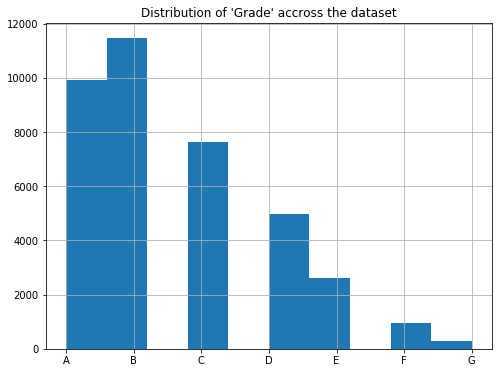

In [25]:
p=loan_df['grade'].hist(figsize=[8,6])
plt.title("Distribution of 'Grade' accross the dataset")
plt.show()

### Inference: Most population with Grade 'B' in the data set of fully paid and current

Uni-variate analysis on the unordered categorical values
2. address of the state to find the distribution

In [26]:
loan_df['addr_state'].describe()

count     37830
unique       49
top          CA
freq       6859
Name: addr_state, dtype: object

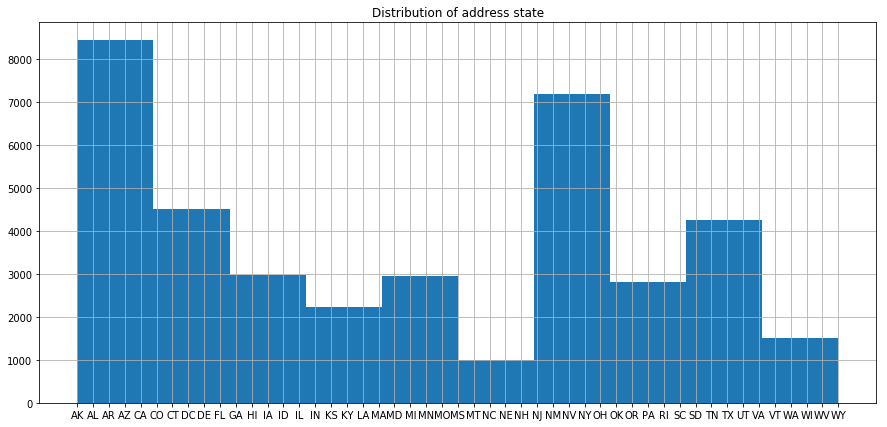

In [27]:
p=loan_df['addr_state'].hist(figsize=[15,7])
plt.title("Distribution of address state")
plt.show()

### Inference: Few States AK, AL,AR and CA topped with most of the population

Uni-variate analysis on the unordered categorical values on the home ownership

In [28]:
loan_df['home_ownership'].describe()

count     37830
unique        4
top        RENT
freq      18068
Name: home_ownership, dtype: object

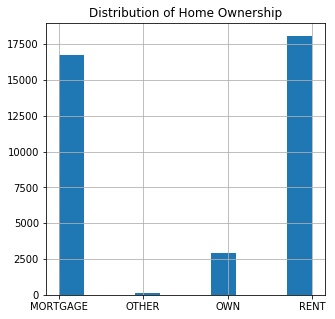

In [29]:
p=loan_df['home_ownership'].hist(figsize=[5,5])
plt.title("Distribution of Home Ownership")
plt.show()

### Inference: Most population with home ownership in the category RENT in the data set of fully paid and current

Uni-variate analysis on the unordered categorical values on the verification status

In [30]:
loan_df['verification_status'].describe()

count            37830
unique               3
top       Not Verified
freq             15969
Name: verification_status, dtype: object

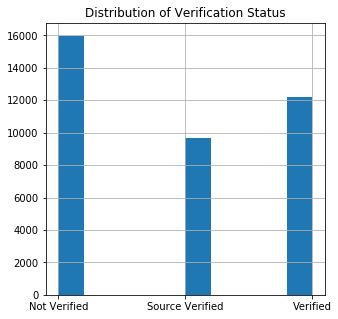

In [31]:
p=loan_df['verification_status'].hist(figsize=[5,5])
plt.title("Distribution of Verification Status")
plt.show()

### Inference: Most population with verification status in the category not verified in the data set of fully paid and current

## Uni-variate analysis on the ordered categorical values
annual inc to understand the distribution of the variable across data

In [32]:
loan_df['annual_inc'].describe()

count    3.783000e+04
mean     6.879568e+04
std      6.356907e+04
min      4.000000e+03
25%      4.013709e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

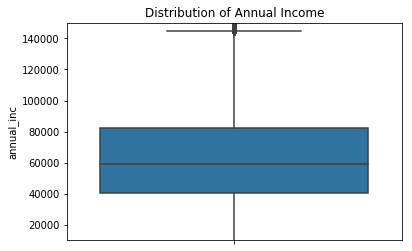

In [33]:
sns.boxplot(y=loan_df['annual_inc'])
#plt.yscale('log')
plt.ylim(10000, 150000)
plt.title("Distribution of Annual Income")
plt.show()

### Inference: Median value of Annual Income of 60000 in the data 

In [34]:
loan_df['dti'].describe()

count    37830.000000
mean        13.321270
std          6.662912
min          0.000000
25%          8.190000
50%         13.410000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

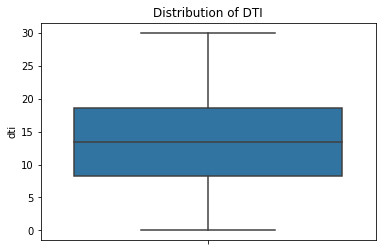

In [35]:
sns.boxplot(y=loan_df['dti'])
#plt.yscale('log')
#plt.ylim(5, 50)
plt.title("Distribution of DTI")
plt.show()

### Inference: Median value of dti around 14 in the data with lower range of 9 and upper range of 18 

In [36]:
loan_df['installment'].describe()

count    37830.000000
mean       322.689268
std        208.626363
min         16.000000
25%        166.000000
50%        278.000000
75%        426.000000
max       1305.000000
Name: installment, dtype: float64

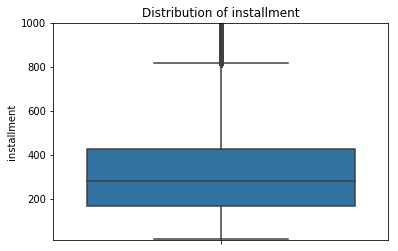

In [37]:
sns.boxplot(y=loan_df['installment'])
#plt.yscale('log')
plt.ylim(10, 1000)
plt.title("Distribution of installment")
plt.show()

### Inference: Median value of installment around 300 in the data, lower range around 200 and upper range with 400

In [38]:
loan_df['emp_length'].describe()

count         36800
unique           11
top       10+ years
freq           8368
Name: emp_length, dtype: object

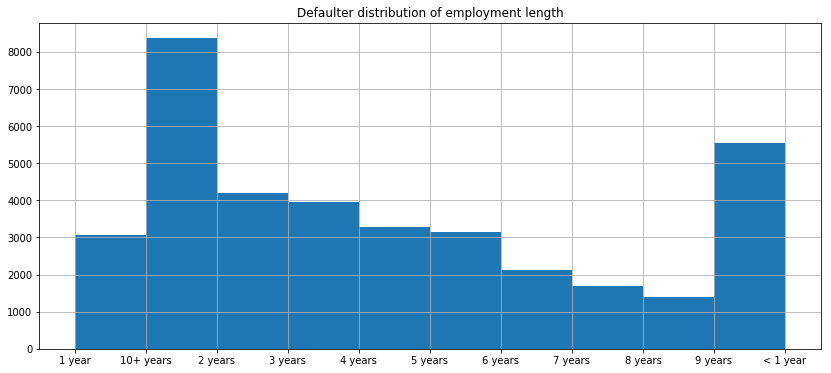

In [39]:
p=loan_df['emp_length'].hist(figsize=[14,6])
plt.title("Defaulter distribution of employment length")
plt.show()

### Inference: Most population with 10+ years followed by 1 year 

In [40]:
loan_df['loan_amnt'].describe()

count    37830.000000
mean     11075.510838
std       7364.004300
min        500.000000
25%       5400.000000
50%       9750.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

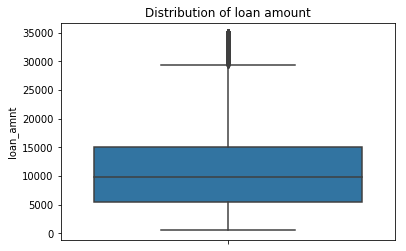

In [41]:
sns.boxplot(y=loan_df['loan_amnt'])
#plt.yscale('log')
#plt.ylim(5, 50)
plt.title("Distribution of loan amount")
plt.show()

### Inference: Median value of loan amount is 10000  in the data, lower range around 6000 and upper range with 15000

In [42]:
loan_df['funded_amnt'].describe()

count    37830.000000
mean     10809.682791
std       7102.993903
min        500.000000
25%       5200.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

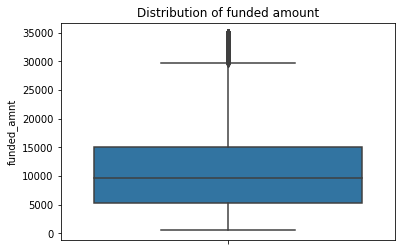

In [43]:
sns.boxplot(y=loan_df['funded_amnt'])
#plt.yscale('log')
#plt.ylim(5, 50)
plt.title("Distribution of funded amount")
plt.show()

### Inference:- Median value of funded amount is 10000  in the data, lower range around 6000 and upper range with 15000

Uni-variate analysis on the prdered categorical values on Credit balance 
to understand the distribution of the variable across data

In [44]:
loan_df['revol_bal'].describe()

count     37830.000000
mean      13298.879117
std       15820.938927
min           0.000000
25%        3687.000000
50%        8789.000000
75%       16931.000000
max      149588.000000
Name: revol_bal, dtype: float64

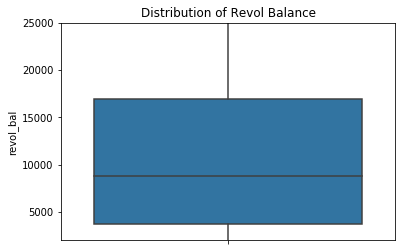

In [45]:
sns.boxplot(y=loan_df['revol_bal'])
#plt.yscale('log')
plt.ylim(2000,25000)
plt.title("Distribution of Revol Balance")
plt.show()

Uni-variate analysis on the prdered categorical values on Credit utilization
to understand the distribution of the variable across data

In [46]:
loan_df['revol_util'].describe()

count    37830.000000
mean         0.488274
std          0.283384
min          0.000000
25%          0.253000
50%          0.493000
75%          0.724000
max          0.999000
Name: revol_util, dtype: float64

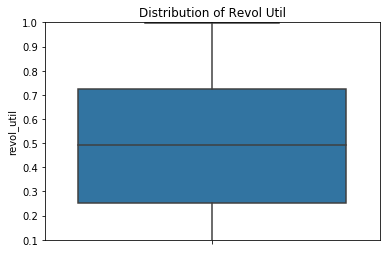

In [47]:
sns.boxplot(y=loan_df['revol_util'])
#plt.yscale('log')
plt.ylim(0.1,1.0)
plt.title("Distribution of Revol Util")
plt.show()

In [48]:
loan_df['purpose'].describe()

count                  37830
unique                    14
top       debt_consolidation
freq                   17752
Name: purpose, dtype: object

In [49]:
def plot_graph(df, param,lower,upper):
    fully_paid_df=loan_df[loan_df.loan_status == 'Fully Paid']
    default_paid_df=loan_df[loan_df.loan_status == 'Charged Off']
    
    plt.figure(figsize=(20, 10)) 
    plt.subplot(1,2,1)
    sns.boxplot(y=default_paid_df[param])
    plt.title(param +' distribution for Default ',fontsize=20)
    plt.ylim(lower, upper)
    
    plt.subplot(1,2,2)
    sns.boxplot(y=fully_paid_df[param])
    plt.title(param +' distribution for Fully Paid ',fontsize=20)
    plt.ylim(lower, upper)
    plt.show()

In [50]:
def plot_bar_graph(column_name,df_segment):
    plt.suptitle('Univariate Analysis (' + column_name + ')', fontsize=15)
    plt.rc("font", size=10)
    plt.figure(figsize=(10, 5))
    sns.barplot(x=df_segment.index, y=column_name, data=df_segment)
    plt.title('Public record bankruptcies  ' + column_name)
    plt.xlabel(column_name,rotation=0, fontsize=20, labelpad=20)
    plt.xticks(rotation=45,fontsize=10)
    plt.ylabel('Frequency',rotation=90, fontsize=20, labelpad=20)
    plt.show()
    return

## Segmented Uni-variate analysis on the continous varilable
annual inc to understand the distribution of the variable across different loan status default and fully paid 

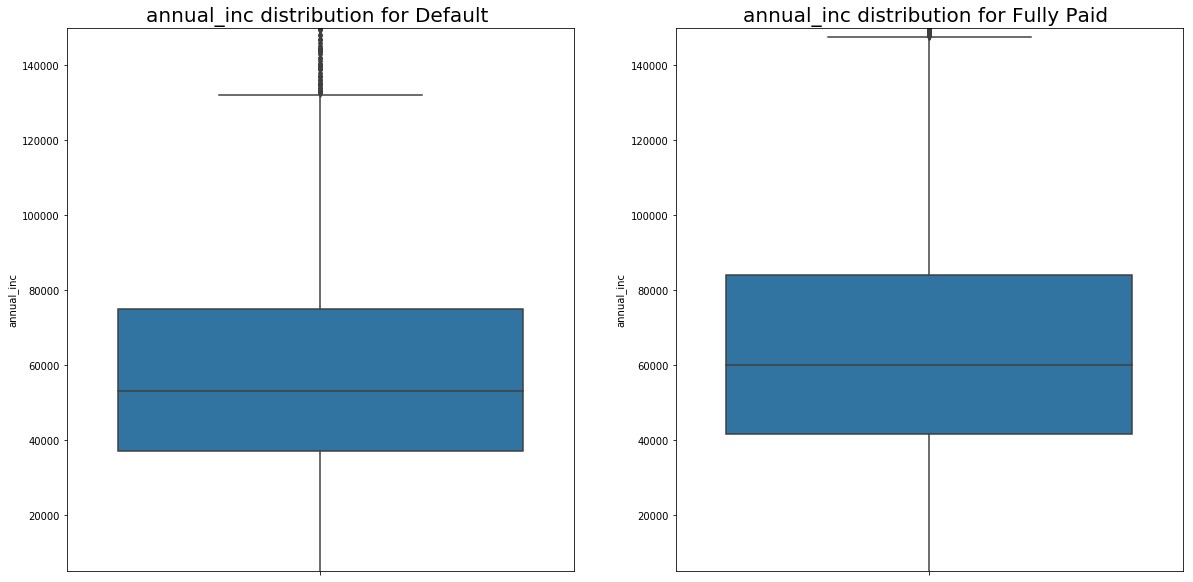

In [104]:
plot_graph(loan_df,'annual_inc',5000,150000)

### Inference:-  50% of the members defaulted in the income group of 50000 

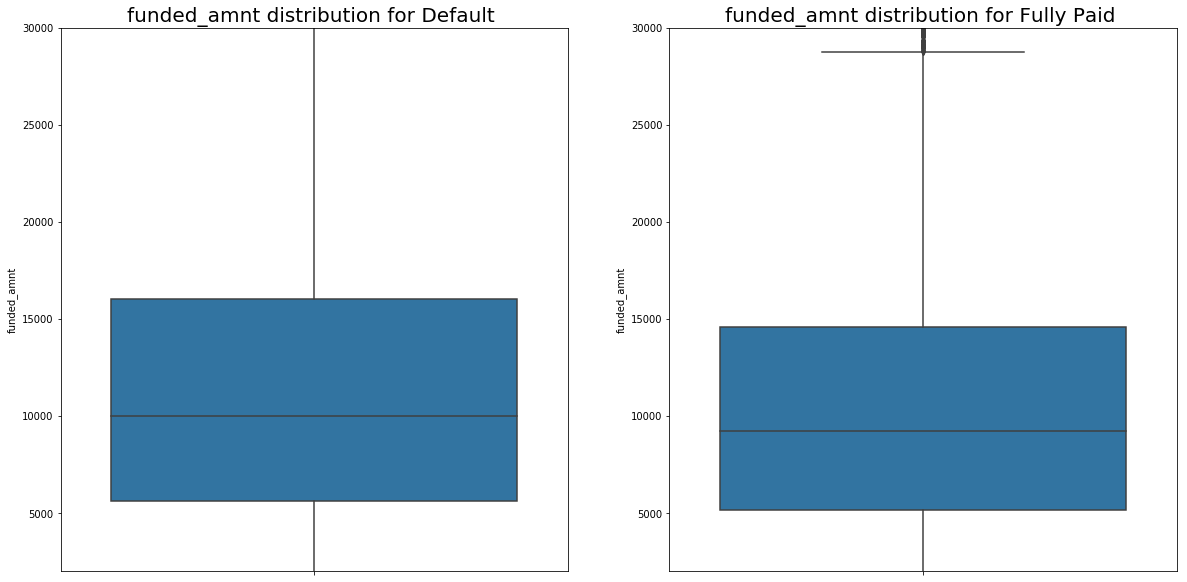

In [105]:
plot_graph(loan_df,'funded_amnt',2000,30000)

50% of the members defaulted in the funded amount of 10000

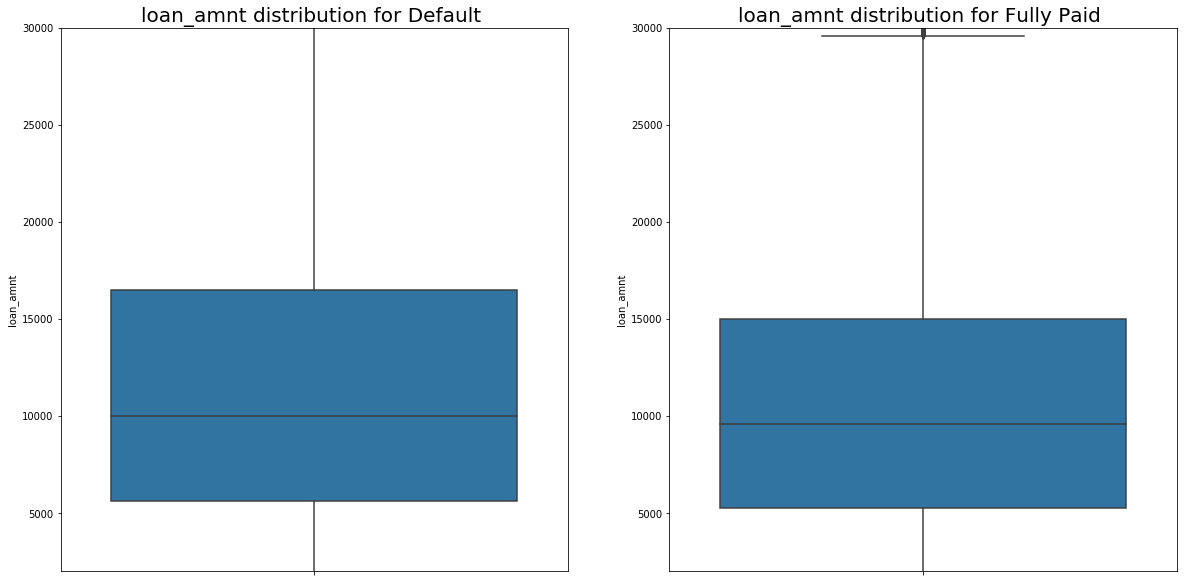

In [106]:
plot_graph(loan_df,'loan_amnt',2000,30000)

50% of the members defaulted in the loan amount of 10000

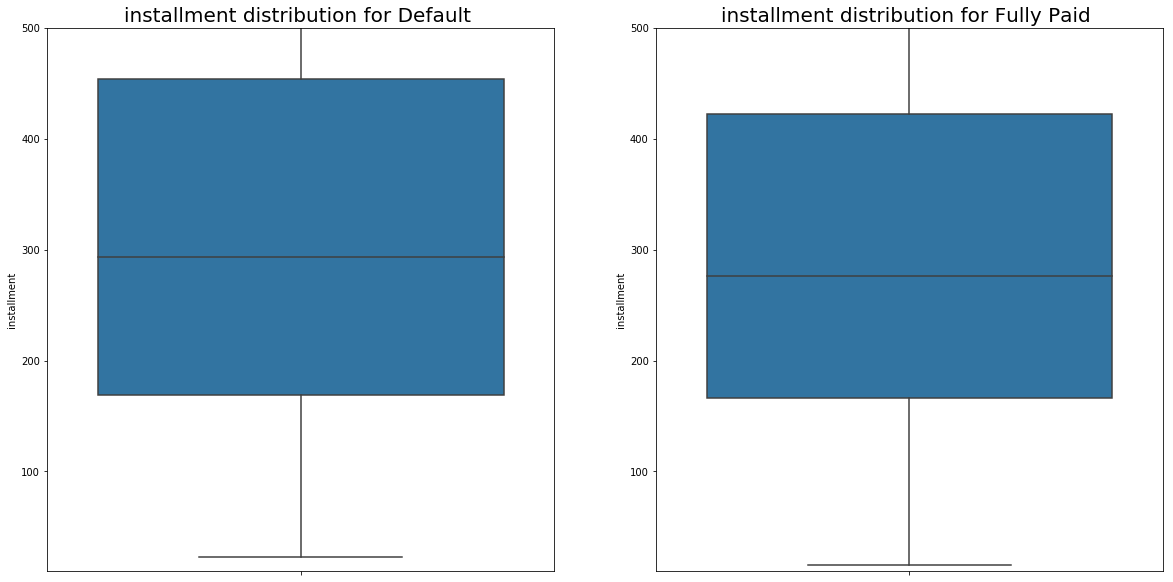

In [107]:
plot_graph(loan_df,'installment',10,500)

### Inference:- 50% of the members defaulted in the installment range of 300

Uni-variate analysis on the continous varilable on public record bankruptcies 
to understand the distribution of the variable 

In [108]:
fully_paid_df=loan_df[loan_df.loan_status == 'Fully Paid']
default_paid_df=loan_df[loan_df.loan_status  == 'Charged Off']

In [109]:
def plot_pie_chart(col_name,df,title):
    label_list=df.index
    colors = ['green','orange','red','yellow','purple']
    plt.figure(1, figsize=(6,6))
    plt.axis('equal')
    plt.pie(df,labels=label_list,autopct="%1.1f%%",colors=colors,startangle=90) 
    plt.title(title) 
    plt.show()

Distribution of data in percentage across home ownership in the default and fully paid customer data

home_ownership
MORTGAGE    14481
OTHER          78
OWN          2480
RENT        15298
Name: home_ownership, dtype: int64


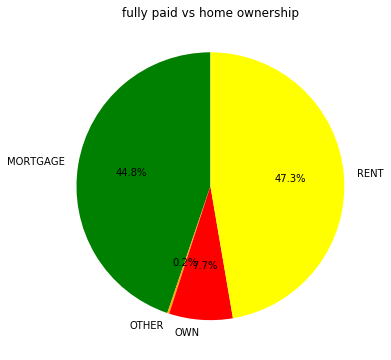

home_ownership
MORTGAGE    2277
OTHER         18
OWN          428
RENT        2770
Name: home_ownership, dtype: int64


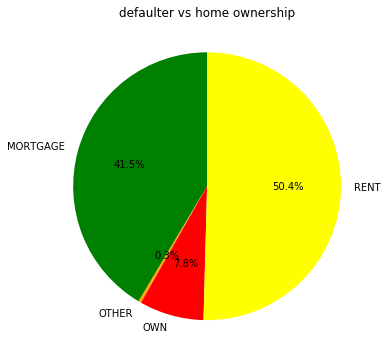

In [110]:
df2 = fully_paid_df.home_ownership.groupby(loan_df.home_ownership).count()
print(df2)
plot_pie_chart("home_ownership",df2,"fully paid vs home ownership")

df2 = default_paid_df.home_ownership.groupby(loan_df.home_ownership).count()
print(df2)
plot_pie_chart("home_ownership",df2,"defaulter vs home ownership")

### Inference:- 50% of the population defaulted are in the home ownership as 'RENT'

In [111]:
loan_df.groupby(['loan_status', 'home_ownership']).id.agg(['count'])

count
loan_status home_ownership       
Charged Off MORTGAGE         2277
            OTHER              18
            OWN               428
            RENT             2770
Fully Paid  MORTGAGE        14481
            OTHER              78
            OWN              2480
            RENT            15298

### Distribution of data in the verification status (Not verified, verified) for fully paid vs default 

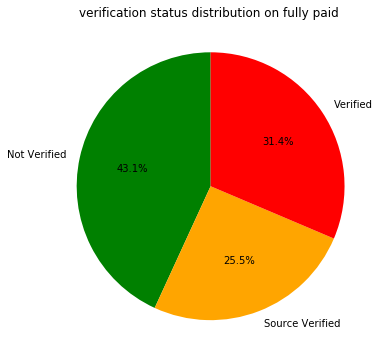

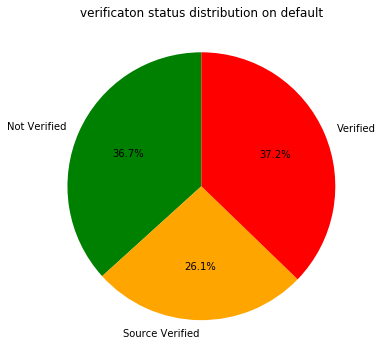

In [112]:
df2 = fully_paid_df.verification_status.groupby(loan_df.verification_status).count()
plot_pie_chart("home_ownership",df2,"verification status distribution on fully paid ")

df2 = default_paid_df.verification_status.groupby(loan_df.verification_status).count()
plot_pie_chart("home_ownership",df2,"verificaton status distribution on default")

### Inference:- equal of the population defaulted vs fully paid  in the verification status

create a pie-chart with the percentage to understand the distribution of employment length data in the fully paid vs default 

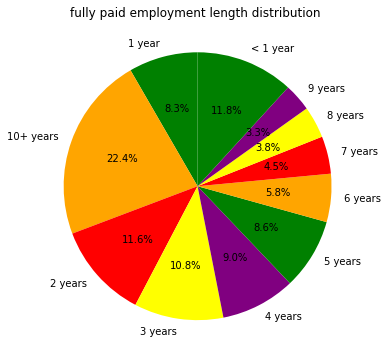

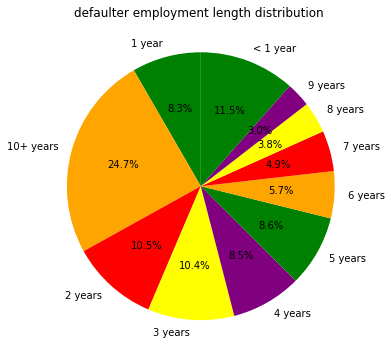

In [113]:
df2 = fully_paid_df.emp_length.groupby(loan_df.emp_length).count()
plot_pie_chart("emp_length",df2,"fully paid employment length distribution ")

df2 = default_paid_df.emp_length.groupby(loan_df.emp_length).count()
plot_pie_chart("emp_length",df2,"defaulter employment length distribution ")

### Most of the defaulter employment length are as follow
1 :- 10+ Years
2 :- <1 year
3 :- 2 years
4 :- 3 years

Creating a derived metrics based on the fully paid and charged off 
default-to-paid ratio. This ratio is calculated based on the 
1. Take the total number of charged off data
2. Take the total number of fully paid data 
3. Divide the charged off data with fully paid data including the charged off 
4. Default-to-paid ratio is being used as an indicator to conduct a bivariate on the categorical
variables to check the signifigance of the default 

In [114]:
loan_df['charged_off'] = 0 #initialize with 0 for Charged Off
loan_df['fully_paid']  = 0 #initialize with 0 for fully paid
loan_df.loc[loan_df.loan_status =='Charged Off','charged_off']=1
loan_df.loc[loan_df.loan_status =='Fully Paid','fully_paid']=1

In [115]:
def plot_for_seg_univariate(column_name,df_segment):
    plt.suptitle('Segmented Univariate Analysis (' + column_name + ')', fontsize=24)
    plt.rc("font", size=10)
    plt.figure(figsize=(20, 10))
    sns.barplot(x=df_segment.index, y='default_topaid_ratio', data=df_segment)
    plt.title('Default to Paid Ratio vs ' + column_name)
    plt.xlabel(column_name,rotation=0, fontsize=20, labelpad=20)
    plt.xticks(rotation=45,fontsize=10)
    plt.ylabel('Default to Paid Ratio',rotation=90, fontsize=20, labelpad=20)
    plt.show()
    return

In [116]:
def debt_default_by_segment(column ,showsize=10):
        loan_df_column_status=loan_df.pivot_table(values=['charged_off','fully_paid'],index=[column],aggfunc=('sum'))
        loan_df_column_status['percent_charged_off']= round(100*(loan_df_column_status.charged_off/(loan_df_column_status.charged_off+loan_df_column_status.fully_paid)),2)
        loan_df_column_status['default_topaid_ratio']= loan_df_column_status.charged_off/loan_df_column_status.fully_paid
        loan_df_column_status.head(showsize)
        return loan_df_column_status

In [117]:
def debt_default_by_segment_numbins(column ,new_bin_col_name,binval,showsize=10):
        loan_df[new_bin_col_name] = pd.cut(loan_df[column], binval)
        loan_df_column_status=loan_df.pivot_table(values=['charged_off','fully_paid'],index=[new_bin_col_name],aggfunc=('sum'))
        loan_df_column_status['percent_charged_off']= round(100*loan_df_column_status.charged_off/(loan_df_column_status.charged_off + loan_df_column_status.fully_paid),2)
        loan_df_column_status['default_topaid_ratio']= loan_df_column_status.charged_off/(loan_df_column_status.charged_off+loan_df_column_status.fully_paid)
        loan_df_column_status.head(showsize)
        return loan_df_column_status

Segmented univariate analysis of 
1. loan grade v/s Default to Paid ratio based on the grade by percentage of values in the charged off status 
2. Pie-chart by distribution of percentage 

       charged_off  fully_paid  percent_charged_off  default_topaid_ratio
grade                                                                    
G               99         196                33.56              0.505102
F              310         645                32.46              0.480620
E              701        1916                26.79              0.365866
D             1082        3876                21.82              0.279154
C             1309        6328                17.14              0.206858
B             1396       10069                12.18              0.138643
A              596        9307                 6.02              0.064038


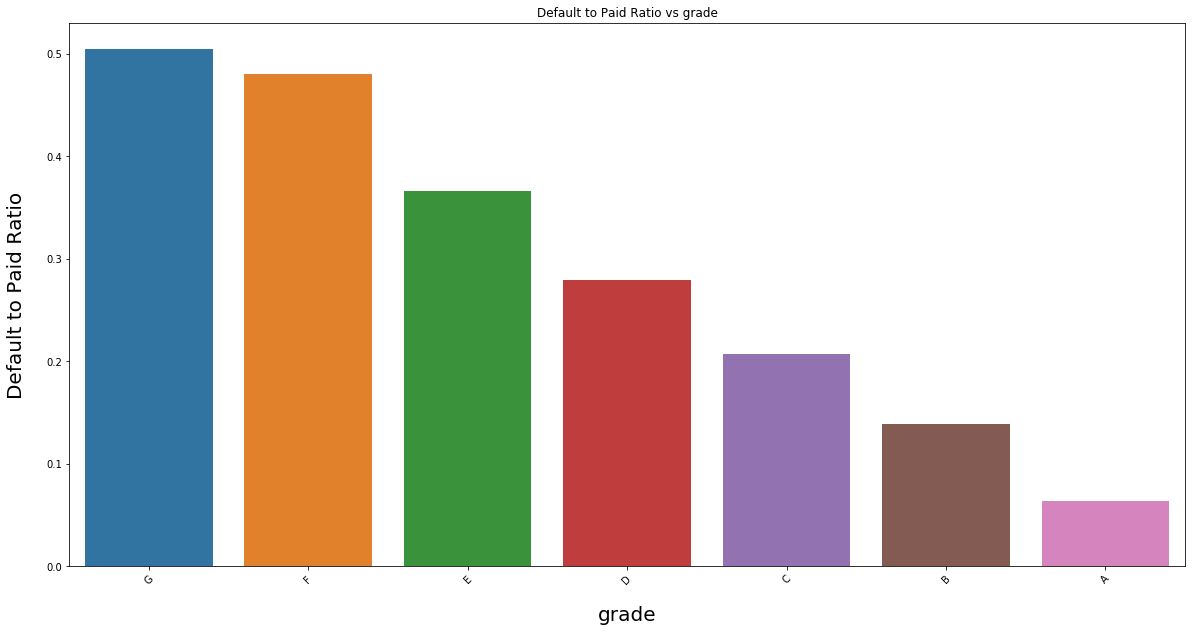

In [118]:
sub_df=debt_default_by_segment('grade').sort_values(by='percent_charged_off',ascending=False)
print(sub_df)
plot_for_seg_univariate('grade',sub_df)

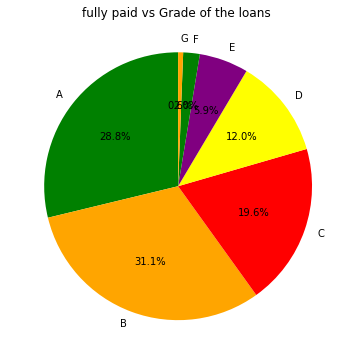

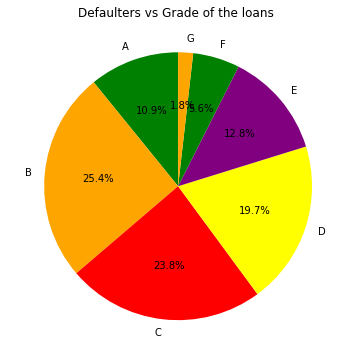

In [119]:
df2 = fully_paid_df.grade.groupby(loan_df.grade).count()
plot_pie_chart("grade",df2,"fully paid vs Grade of the loans ")

df2 = default_paid_df.grade.groupby(loan_df.grade).count()
plot_pie_chart("grade",df2,"Defaulters vs Grade of the loans ")

### Most of the defaulter in the dataset are in the 'B' ,'C' and 'D' grade
### Inference: 50% of the population in grade 'G' and 'F' have defaulted

Segmented univariate analysis of 
1. home ownership v/s Default to Paid ratio based on the home ownership by percentage of values in the charged off status 
2. Pie-chart by distribution of percentage 

                charged_off  fully_paid  percent_charged_off  \
home_ownership                                                 
OTHER                    18          78                18.75   
RENT                   2770       15298                15.33   
OWN                     428        2480                14.72   
MORTGAGE               2277       14481                13.59   

                default_topaid_ratio  
home_ownership                        
OTHER                       0.230769  
RENT                        0.181069  
OWN                         0.172581  
MORTGAGE                    0.157241  


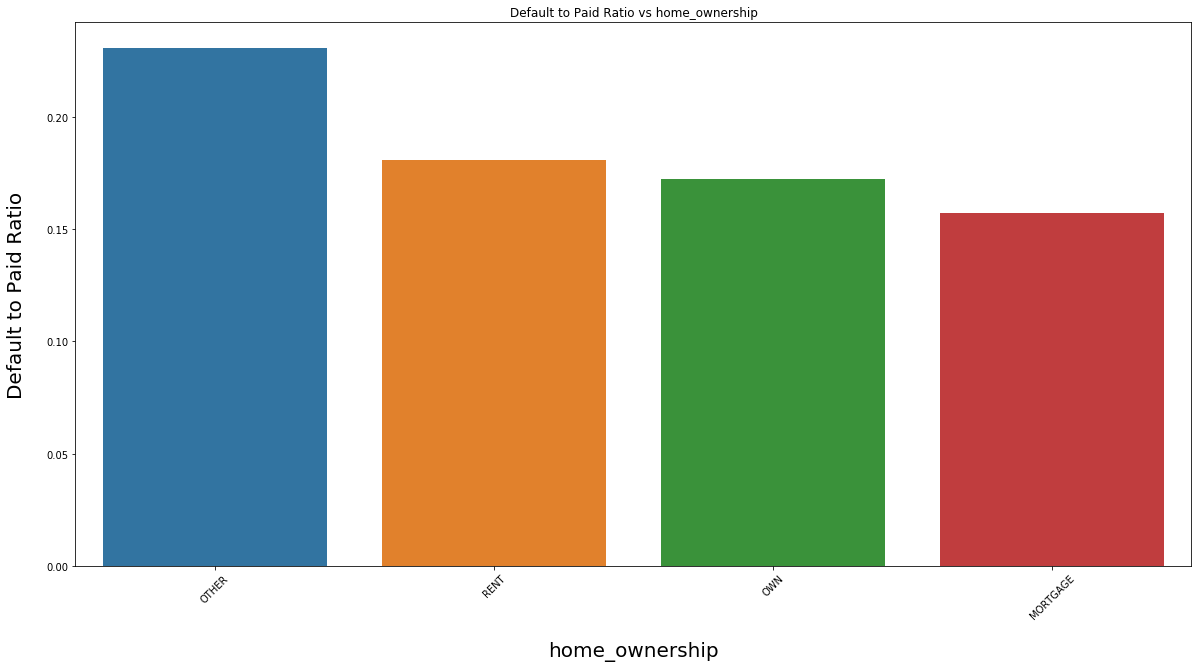

In [120]:
df2=debt_default_by_segment('home_ownership').sort_values(by='percent_charged_off',ascending=False)
print(df2)
plot_for_seg_univariate('home_ownership',df2)

### Most of the defaulter in the dataset are defaulted in the 'Mortgage', 'Rent'
### Inference: 23% of the population out of total in the Home ownership "OTHER" have defaulted followed by RENT

Segmented univariate analysis of 
1. Verification Status v/s Default to Paid ratio based on the grade by percentage of values in the charged off status 
2. Pie-chart by distribution of percentage 

                     charged_off  fully_paid  percent_charged_off  \
verification_status                                                 
Verified                    2045       10150                16.77   
Source Verified             1431        8235                14.80   
Not Verified                2017       13952                12.63   

                     default_topaid_ratio  
verification_status                        
Verified                         0.201478  
Source Verified                  0.173770  
Not Verified                     0.144567  


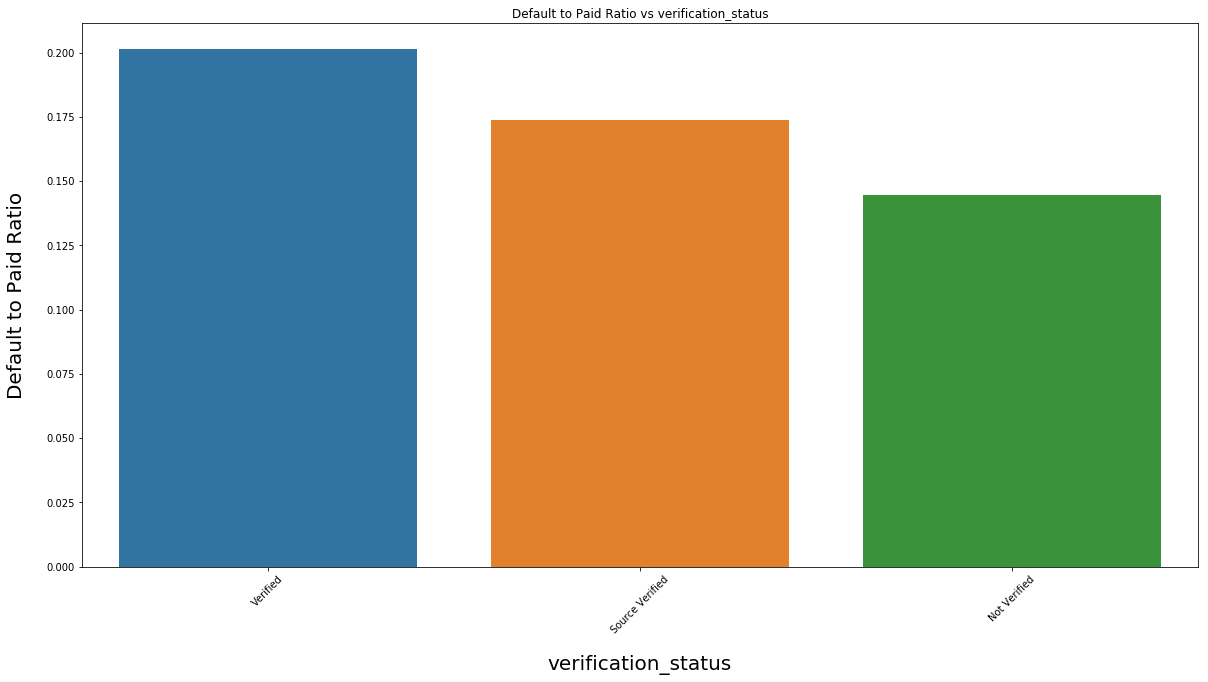

In [121]:
df2=debt_default_by_segment('verification_status').sort_values(by='percent_charged_off',ascending=False)
print(df2)
plot_for_seg_univariate('verification_status',df2)

### Inference: 20% of the population out of total with verification status has defaulted

Segmented univariate analysis of 
1. address state v/s Default to Paid ratio based on the grade by percentage of values in the charged off status 


            charged_off  fully_paid  percent_charged_off  default_topaid_ratio
addr_state                                                                    
NE                    0           1                 0.00              0.000000
IN                    0           1                 0.00              0.000000
ID                    0           4                 0.00              0.000000
IA                    0           1                 0.00              0.000000
WY                    4          75                 5.06              0.053333
DC                   14         192                 6.80              0.072917
DE                   11          99                10.00              0.111111
MS                    2          17                10.53              0.117647
AR                   27         204                11.69              0.132353
VT                    6          45                11.76              0.133333
TX                  310        2299                1

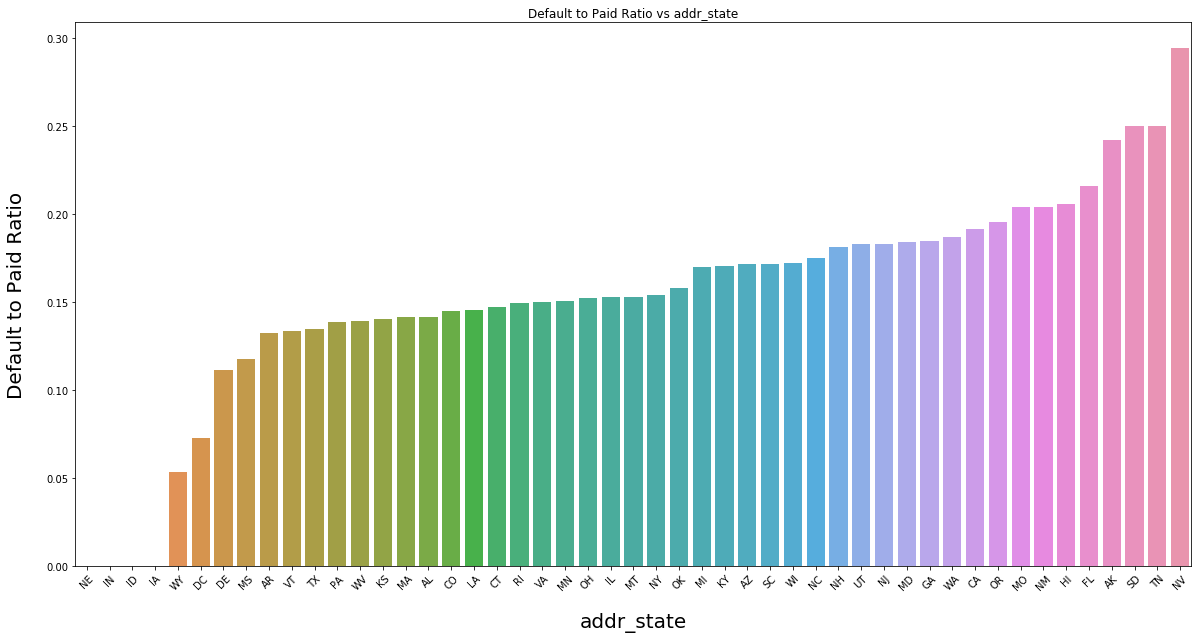

In [122]:
df2=debt_default_by_segment('addr_state').sort_values(by='percent_charged_off',ascending=True)
print(df2)
plot_for_seg_univariate('addr_state',df2)

### Inference: NV , AK and TN with most default probabilities 

Segmented univariate analysis of 
1. Purpose v/s Default to Paid ratio based on the grade by percentage of values in the charged off status 
2. Pie-chart by distribution of percentage 

                    charged_off  fully_paid  percent_charged_off  \
purpose                                                            
small_business              457        1243                26.88   
renewable_energy             19          83                18.63   
educational                  53         251                17.43   
other                       615        3132                16.41   
house                        58         304                16.02   
moving                       89         476                15.75   
medical                     104         566                15.52   
debt_consolidation         2711       15041                15.27   
vacation                     53         315                14.40   
home_improvement            335        2487                11.87   
credit_card                 533        4394                10.82   
car                         156        1324                10.54   
wedding                      93         813     

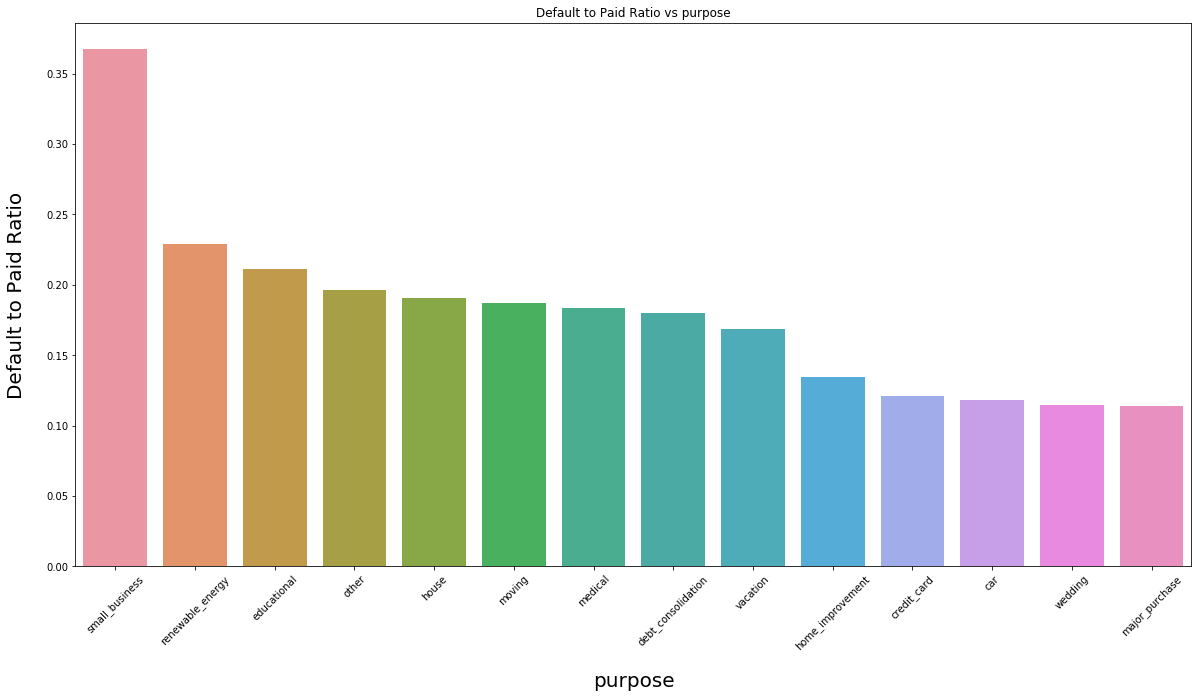

In [123]:
df2=debt_default_by_segment('purpose').sort_values(by='percent_charged_off',ascending=False)
print(df2)
plot_for_seg_univariate('purpose',df2)

### Inference: Small business, revnewable energy and house with most default probabilities 

            charged_off  fully_paid  percent_charged_off  default_topaid_ratio
emp_length                                                                    
9 years             156        1053                12.90              0.148148
2 years             555        3647                13.21              0.152180
4 years             448        2842                13.62              0.157635
3 years             549        3398                13.91              0.161566
6 years             299        1834                14.02              0.163032
< 1 year            608        3721                14.04              0.163397
8 years             199        1209                14.13              0.164599
1 year              439        2632                14.30              0.166793
5 years             453        2704                14.35              0.167530
7 years             258        1428                15.30              0.180672
10+ years          1302        7066                1

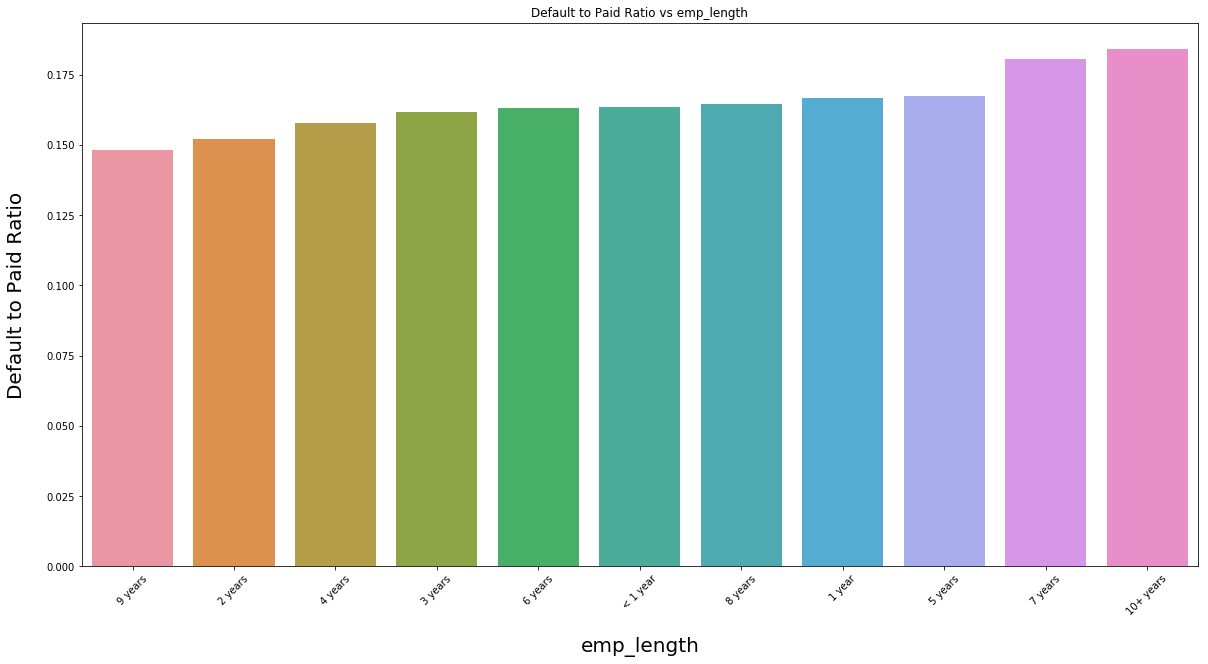

In [408]:
df2=debt_default_by_segment('emp_length').sort_values(by='percent_charged_off',ascending=True)
print(df2)
plot_for_seg_univariate('emp_length',df2)

### Inference:10+ years, 7 years and 5 years with most default probabilities of default

Segmented univariate analysis by creating bins for continuous variable of 
1. debt-to-income ration v/s Default to Paid ratio based on the dti groups by percentage of values in the charged off status 

                  charged_off  fully_paid  percent_charged_off  \
dti_group                                                        
(2.999, 5.998]            412        3107                11.71   
(-0.03, 2.999]            328        2309                12.44   
(5.998, 8.997]            598        4073                12.80   
(8.997, 11.996]           722        4643                13.46   
(26.991, 29.99]            43         275                13.52   
(11.996, 14.995]          880        4939                15.12   
(14.995, 17.994]          808        4528                15.14   
(23.992, 26.991]          216        1148                15.84   
(17.994, 20.993]          814        4048                16.74   
(20.993, 23.992]          672        3267                17.06   

                  default_topaid_ratio  
dti_group                               
(2.999, 5.998]                0.117079  
(-0.03, 2.999]                0.124384  
(5.998, 8.997]                0.128024  
(8

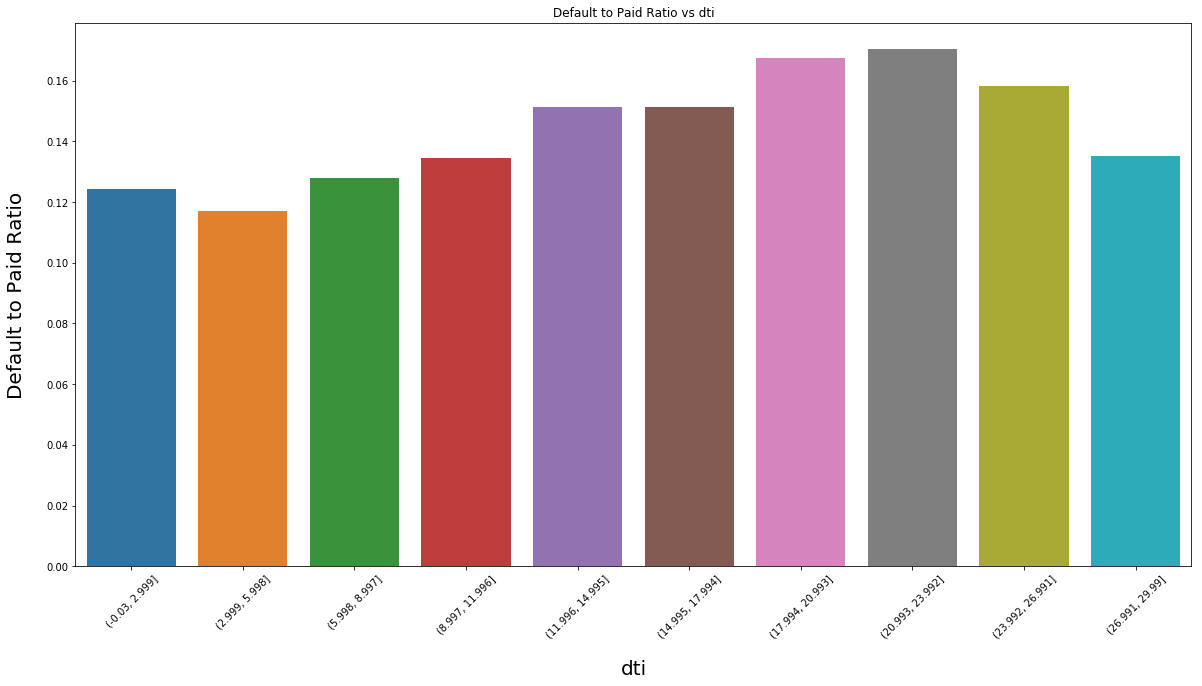

In [124]:
df2=debt_default_by_segment_numbins('dti','dti_group',10).sort_values(by='percent_charged_off',ascending=True)
print(df2)
plot_for_seg_univariate('dti',df2)

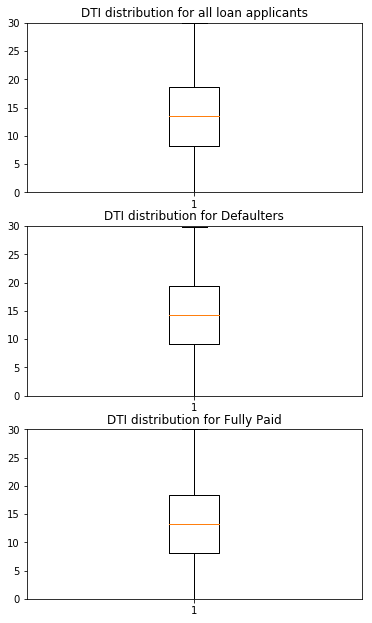

In [129]:
#Plotting annual_inc histogram for all_data,defaulter_data and non_defaultere_data seperately
#To see if we can see a unique pattern for defaulter data
plt.figure(0)

ax = plt.subplots_adjust(left=None, bottom= 3, right=None, top= 5,
                wspace=None, hspace=None)
plt.subplot(311)
plt.boxplot(loan_df['dti'])
plt.ylim(0, 30)
plt.title("DTI distribution for all loan applicants")

plt.subplot(312)
plt.boxplot(default_paid_df['dti'].values)
plt.ylim(0, 30)
plt.title("DTI distribution for Defaulters")

plt.subplot(313)
plt.boxplot(fully_paid_df['dti'])
plt.ylim(0, 30)
plt.title("DTI distribution for Fully Paid")

plt.show()

### Inference: 
### 1. dti group of 20-23 most default probabilities of default
### 2. Median is slightly(14.29) high of DTI for defaulters as compared to fully paid(13.2)

Segmented univariate analysis by categorical variables of 
1. term v/s Default to Paid ratio based by percentage of values in the charged off status
2. distribution across fully paid and charged off loan status groups

            charged_off  fully_paid  percent_charged_off  default_topaid_ratio
term                                                                          
 36 months         3096       25256                10.92              0.122585
 60 months         2397        7081                25.29              0.338512


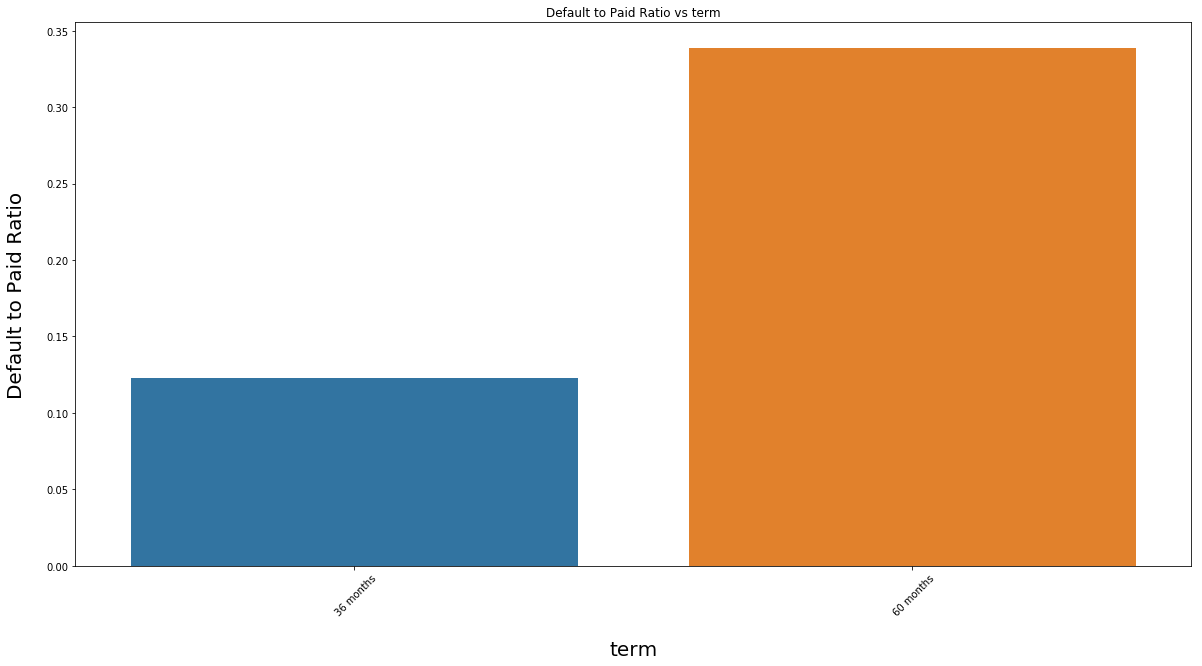

In [130]:
df2=debt_default_by_segment('term').sort_values(by='percent_charged_off',ascending=True)
print(df2)
plot_for_seg_univariate('term',df2)

### Inference: Term of 60 term with 33% default of the total population 

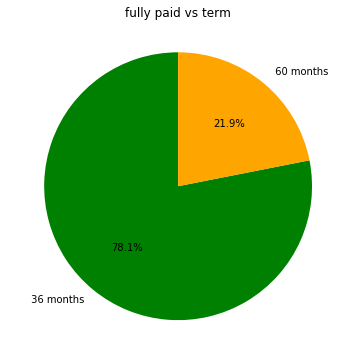

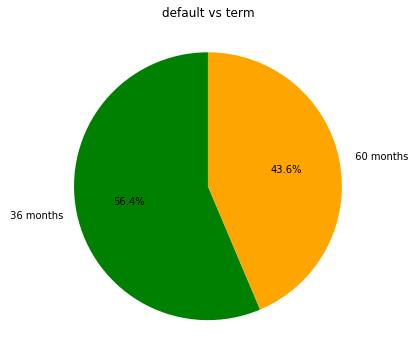

In [131]:
df2 = fully_paid_df.term.groupby(loan_df.term).count()
plot_pie_chart("term",df2,"fully paid vs term")

df2 = default_paid_df.term.groupby(loan_df.term).count()
plot_pie_chart("term",df2,"default vs term")

Segmented univariate analysis by creating bins of numerical variables of 
interest rate v/s Default to Paid ratio based by percentage of values in the charged off status


                  charged_off  fully_paid  percent_charged_off  \
int_group                                                        
(5.401, 7.318]            213        4362                 4.66   
(7.318, 9.216]            368        4726                 7.22   
(9.216, 11.114]           698        5905                10.57   
(11.114, 13.012]         1047        6068                14.72   
(13.012, 14.91]          1025        5082                16.78   
(14.91, 16.808]           957        3510                21.42   
(16.808, 18.706]          643        1689                27.57   
(18.706, 20.604]          329         679                32.64   
(20.604, 22.502]          183         281                39.44   
(22.502, 24.4]             30          35                46.15   

                  default_topaid_ratio  
int_group                               
(5.401, 7.318]                0.046557  
(7.318, 9.216]                0.072242  
(9.216, 11.114]               0.105710  
(1

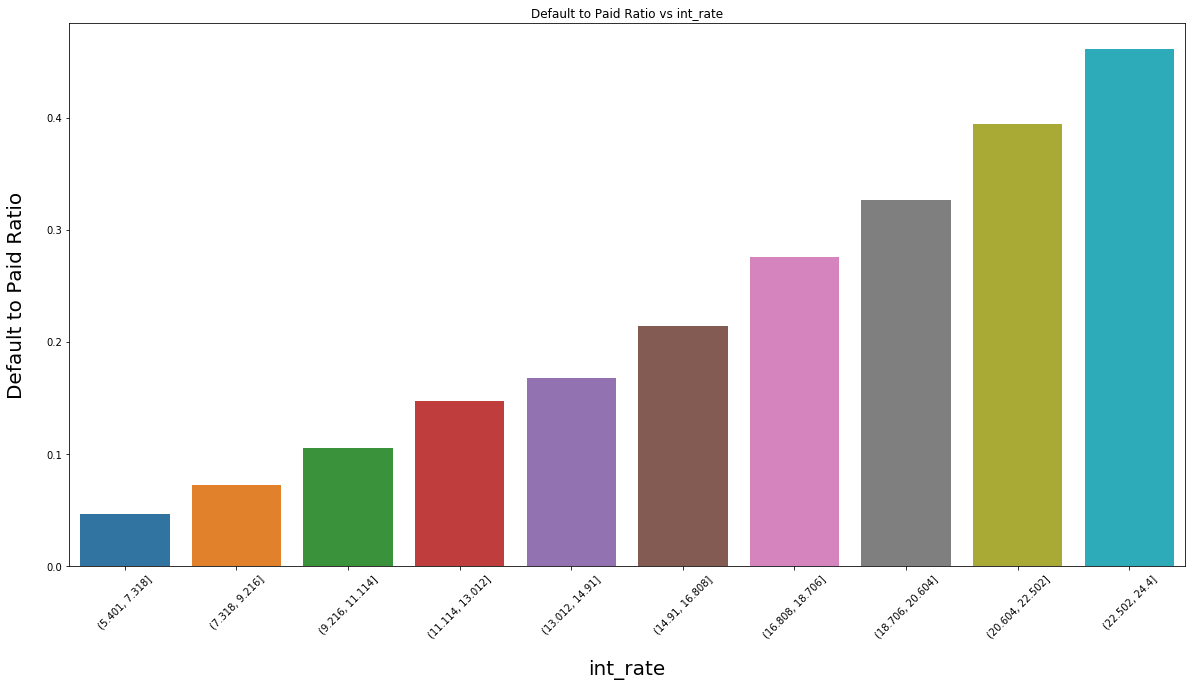

In [132]:
df2=debt_default_by_segment_numbins('int_rate','int_group',10).sort_values(by='percent_charged_off',ascending=True)
print(df2)
plot_for_seg_univariate('int_rate',df2)

### Inference: Interest rate in the range  22 to 24 with 46% default of the total population

Segmented univariate analysis by creating bins of numerical variables of 
loan amount v/s Default to Paid ratio based by percentage of values in the charged off status

                    charged_off  fully_paid  percent_charged_off  \
loan_amt_group                                                     
(6020.0, 6710.0]             90         758                10.61   
(27410.0, 28100.0]           17         138                10.97   
(10850.0, 11540.0]           73         577                11.23   
(5330.0, 6020.0]            300        2282                11.62   
(8780.0, 9470.0]            122         874                12.25   
(23270.0, 23960.0]            7          50                12.28   
(6710.0, 7400.0]            198        1390                12.47   
(3950.0, 4640.0]            237        1589                12.98   
(2570.0, 3260.0]            197        1318                13.00   
(12920.0, 13610.0]           85         566                13.06   
(10160.0, 10850.0]           62         409                13.16   
(14300.0, 14990.0]           57         375                13.19   
(9470.0, 10160.0]           445        2920     

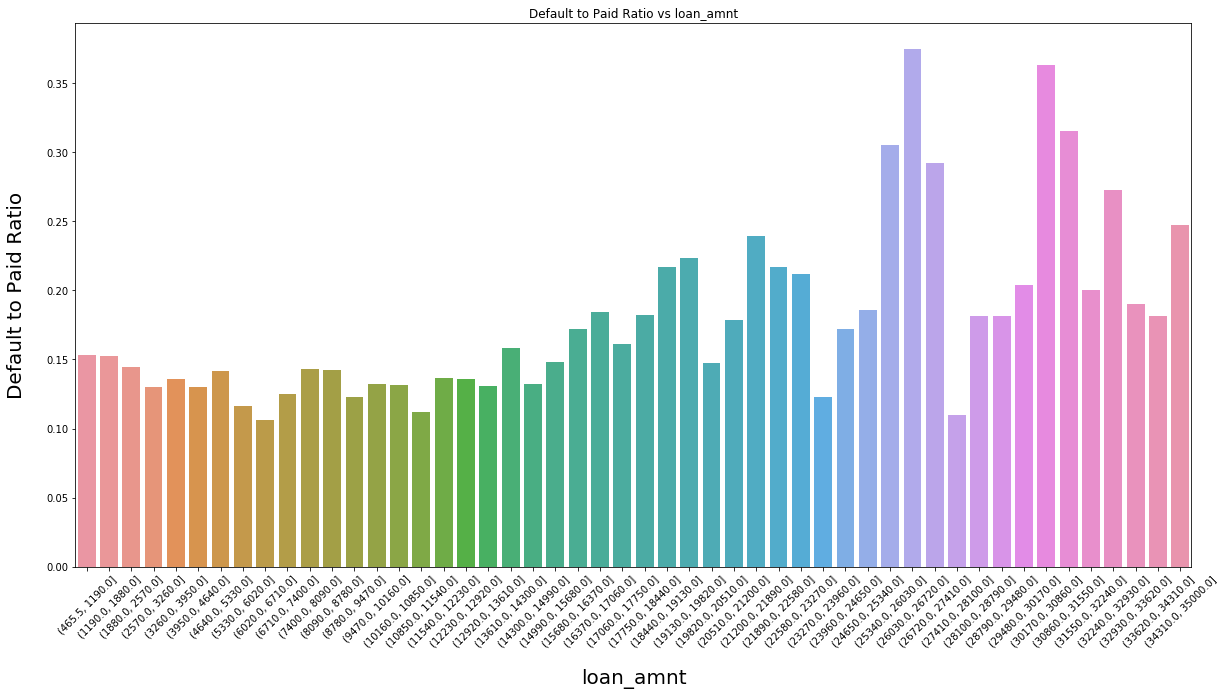

In [133]:
df2=debt_default_by_segment_numbins('loan_amnt','loan_amt_group',50).sort_values(by='percent_charged_off',ascending=True)
print(df2)
plot_for_seg_univariate('loan_amnt',df2)

### Inference: loan amount in the range  30000 to 31000 with 40% default of the total population in the range 

Segmented univariate analysis by creating bins of numerical variables of 
annual income group v/s Default to Paid ratio based by percentage of values in the charged off status

                  charged_off  fully_paid  percent_charged_off  \
income_group                                                     
(200000, 210000]            5          71                 6.58   
(160000, 170000]           13         156                 7.69   
(110000, 120000]          108         962                10.09   
(190000, 200000]           16         142                10.13   
(140000, 150000]           45         392                10.30   
(100000, 110000]          125        1084                10.34   
(220000, 230000]            6          49                10.91   
(170000, 180000]           23         187                10.95   
(120000, 130000]           80         645                11.03   
(90000, 100000]           218        1753                11.06   
(130000, 140000]           56         426                11.62   
(80000, 90000]            301        2171                12.18   
(70000, 80000]            451        3011                13.03   
(60000, 70

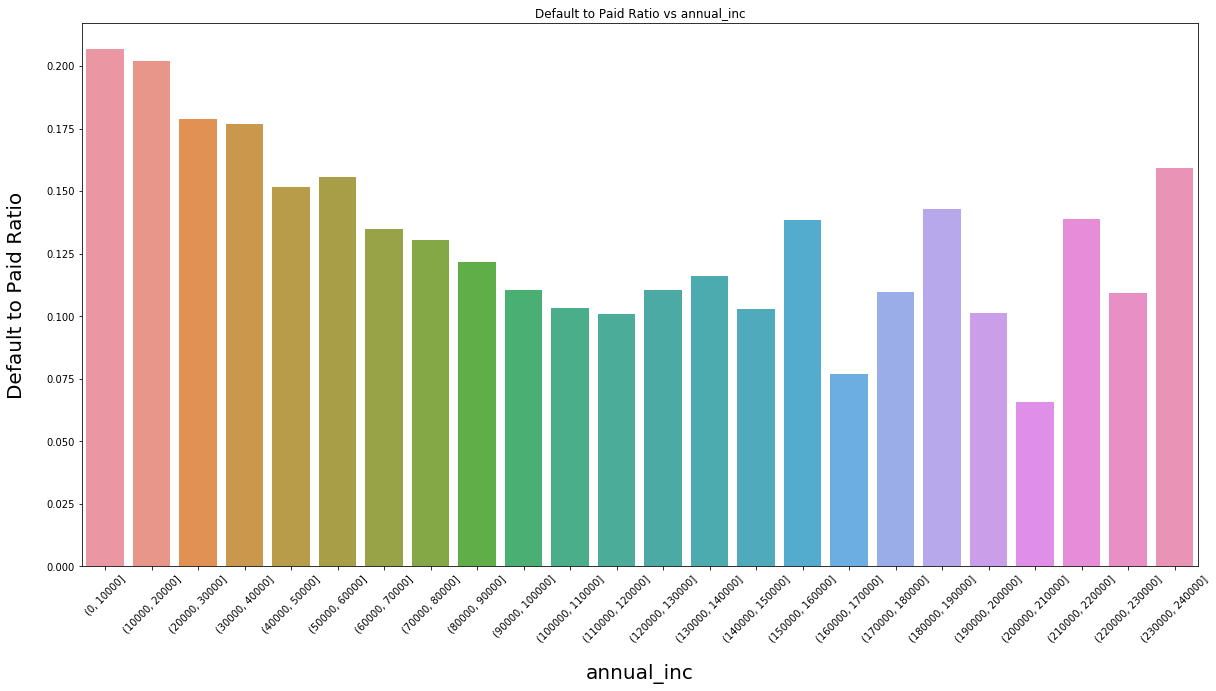

In [134]:
income_group_ordinal=list(np.arange(0,250000,10000))
df2=debt_default_by_segment_numbins('annual_inc','income_group',income_group_ordinal).sort_values(by='percent_charged_off',ascending=True)
print(df2)
plot_for_seg_univariate('annual_inc',df2)

### Inference: annual income in the range  0 to 10000 with 23% default of the total population in the range 

                charged_off  fully_paid  percent_charged_off  \
funding_group                                                  
(28000, 29000]            4          31                11.43   
(5000, 6000]            337        2495                11.90   
(10000, 11000]          109         795                12.06   
(6000, 7000]            247        1800                12.07   
(9000, 10000]           468        3100                13.12   
(12000, 13000]          123         813                13.14   
(8000, 9000]            196        1278                13.30   
(7000, 8000]            380        2432                13.51   
(3000, 4000]            307        1952                13.59   
(4000, 5000]            457        2863                13.77   
(27000, 28000]           22         135                14.01   
(1000, 2000]            191        1169                14.04   
(2000, 3000]            294        1792                14.09   
(11000, 12000]          370        2250 

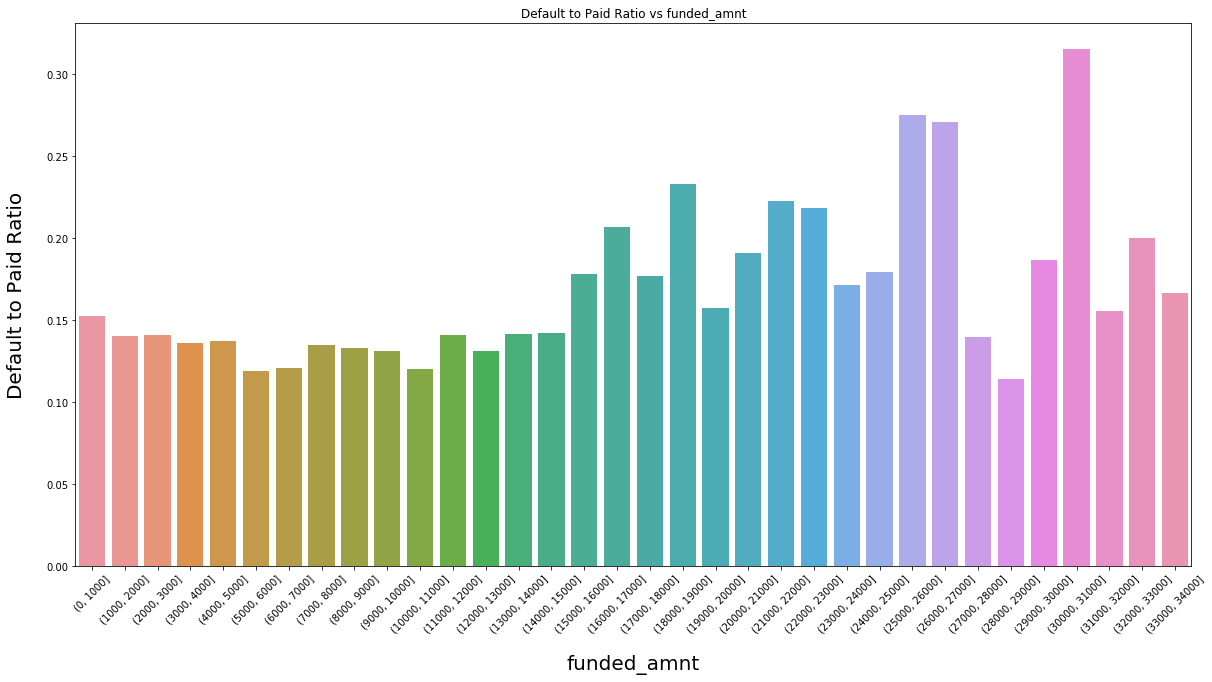

In [135]:
funded_group_ordinal=list(np.arange(0,35000,1000))
df2=debt_default_by_segment_numbins('funded_amnt','funding_group',funded_group_ordinal).sort_values(by='percent_charged_off',ascending=True)
print(df2)
plot_for_seg_univariate('funded_amnt',df2)

### Inference: funde d amount in the range  30000 to 31000 with 29% default of the total population in the range

                      charged_off  fully_paid  percent_charged_off  \
pub_rec_bankruptcies                                                 
0.0                          5125       31064                14.16   
1.0                           366        1270                22.37   
2.0                             2           3                40.00   

                      default_topaid_ratio  
pub_rec_bankruptcies                        
0.0                               0.164982  
1.0                               0.288189  
2.0                               0.666667  


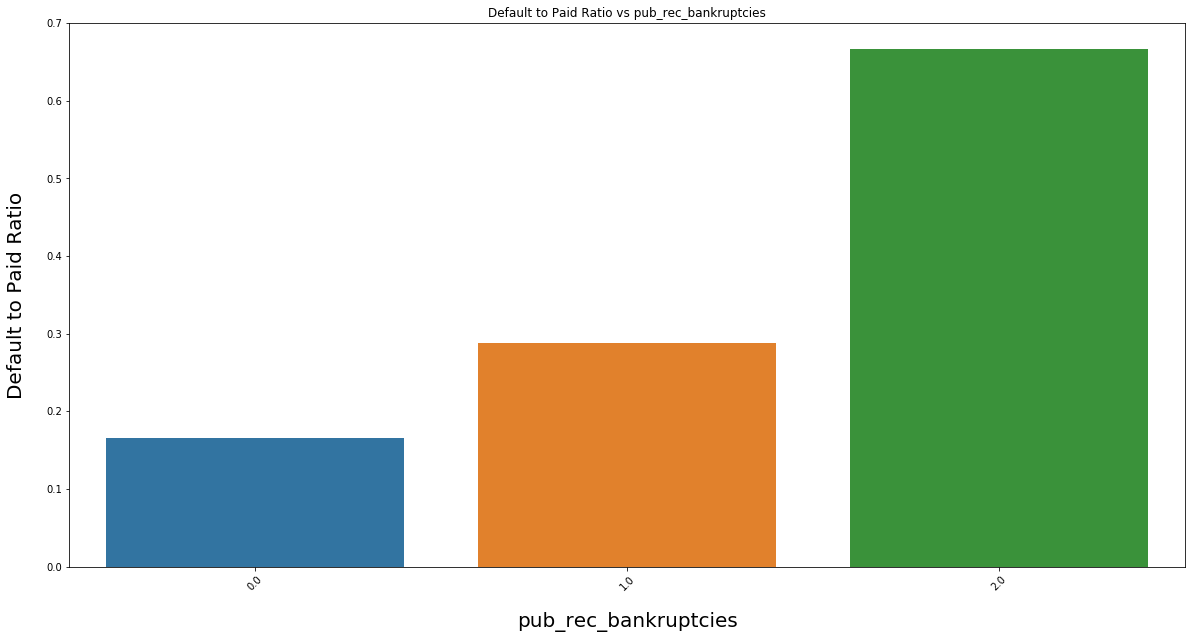

In [136]:
df2=debt_default_by_segment('pub_rec_bankruptcies').sort_values(by='percent_charged_off',ascending=True)
print(df2)
plot_for_seg_univariate('pub_rec_bankruptcies',df2)

### Inference: Public rec bankruptcies 2 out of 3 in the public record bankruptcy of 2 have defaulted (66%)

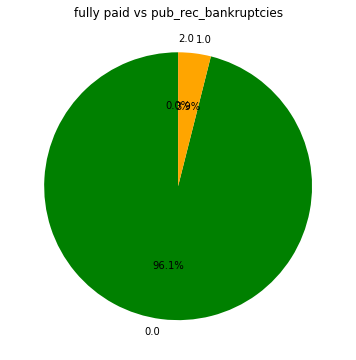

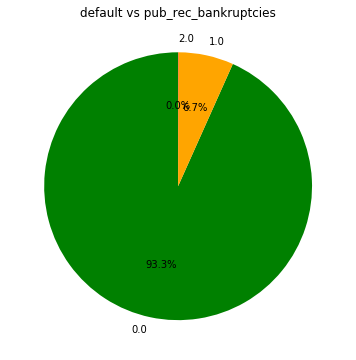

In [137]:
df2 = fully_paid_df.pub_rec_bankruptcies.groupby(loan_df.pub_rec_bankruptcies).count()
plot_pie_chart("pub_rec_bankruptcies",df2,"fully paid vs pub_rec_bankruptcies")

df2 = default_paid_df.pub_rec_bankruptcies.groupby(loan_df.pub_rec_bankruptcies).count()
plot_pie_chart("pub_rec_bankruptcies",df2,"default vs pub_rec_bankruptcies")

                     charged_off  fully_paid  percent_charged_off  \
revol_util_group                                                    
(-0.000999, 0.0999]          418        3848                 9.80   
(0.0999, 0.2]                321        2925                 9.89   
(0.2, 0.3]                   414        3243                11.32   
(0.3, 0.4]                   478        3438                12.21   
(0.4, 0.5]                   591        3543                14.30   
(0.5, 0.599]                 615        3511                14.91   
(0.599, 0.699]               656        3393                16.20   
(0.699, 0.799]               685        3162                17.81   
(0.799, 0.899]               658        2864                18.68   
(0.899, 0.999]               657        2410                21.42   

                     default_topaid_ratio  
revol_util_group                           
(-0.000999, 0.0999]              0.097984  
(0.0999, 0.2]                    0.0988

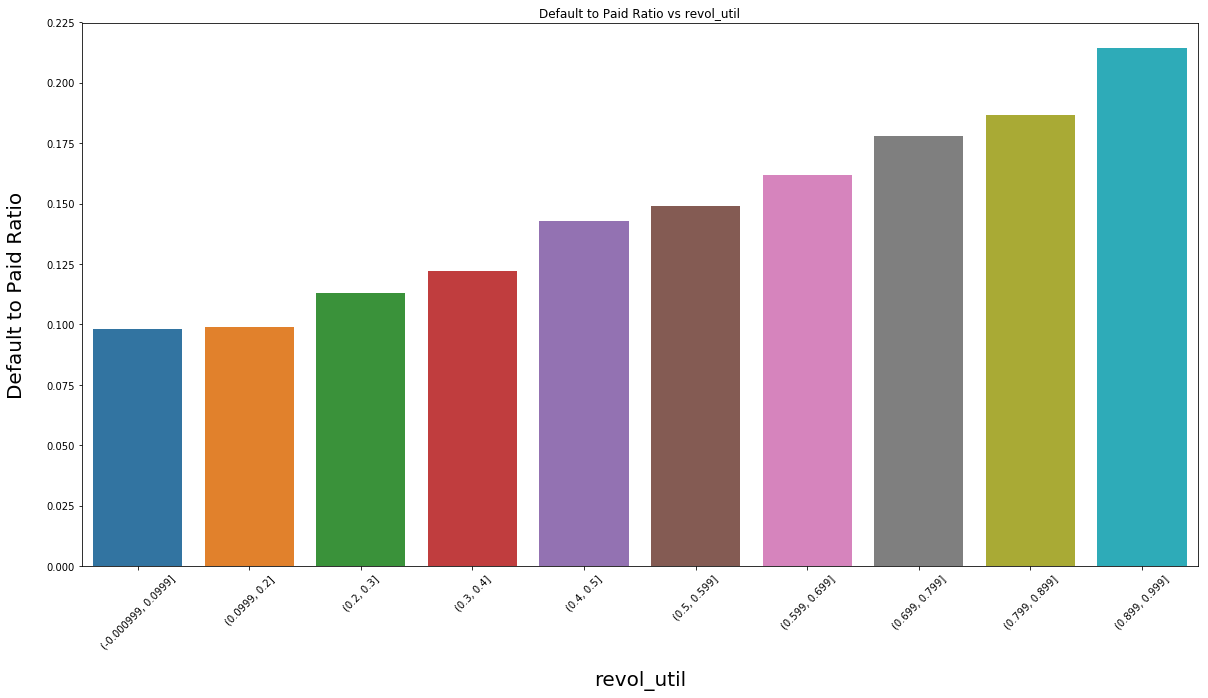

In [138]:
df2=debt_default_by_segment_numbins('revol_util','revol_util_group',10).sort_values(by='percent_charged_off',ascending=True)
print(df2)
plot_for_seg_univariate('revol_util',df2)

### Inference: revol util range of 89%-99% ,20% have defaulted out of total population

In [139]:
loan_df._get_numeric_data()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,charged_off,fully_paid
0,1077501,1296599,5000,5000,4975.000000,10.65,163.0,24000.00,27.65,0,1,3,0,13648,0.8370,9,0.0,0,1
1,1077430,1314167,2500,2500,2500.000000,15.27,60.0,30000.00,1.00,0,5,3,0,1687,0.0940,4,0.0,1,0
2,1077175,1313524,2400,2400,2400.000000,15.96,84.0,12252.00,8.72,0,2,2,0,2956,0.9850,10,0.0,0,1
3,1076863,1277178,10000,10000,10000.000000,13.49,339.0,49200.00,20.00,0,1,10,0,5598,0.2100,37,0.0,0,1
5,1075269,1311441,5000,5000,5000.000000,7.90,156.0,36000.00,11.20,0,3,9,0,7963,0.2830,12,0.0,0,1
6,1069639,1304742,7000,7000,7000.000000,15.96,170.0,47004.00,23.51,0,1,7,0,17726,0.8560,11,0.0,0,1
7,1072053,1288686,3000,3000,3000.000000,18.64,109.0,48000.00,5.35,0,2,4,0,8221,0.8750,4,0.0,0,1
8,1071795,1306957,5600,5600,5600.000000,21.28,152.0,40000.00,5.55,0,2,11,0,5210,0.3260,13,0.0,1,0
9,1071570,1306721,5375,5375,5350.000000,12.69,121.0,15000.00,18.08,0,0,2,0,9279,0.3650,3,0.0,1,0
10,1070078,1305201,6500,6500,6500.000000,14.65,153.0,72000.00,16.12,0,2,14,0,4032,0.2060,23,0.0,0,1


## Bivariate analysis using correlation metrics

No handles with labels found to put in legend.


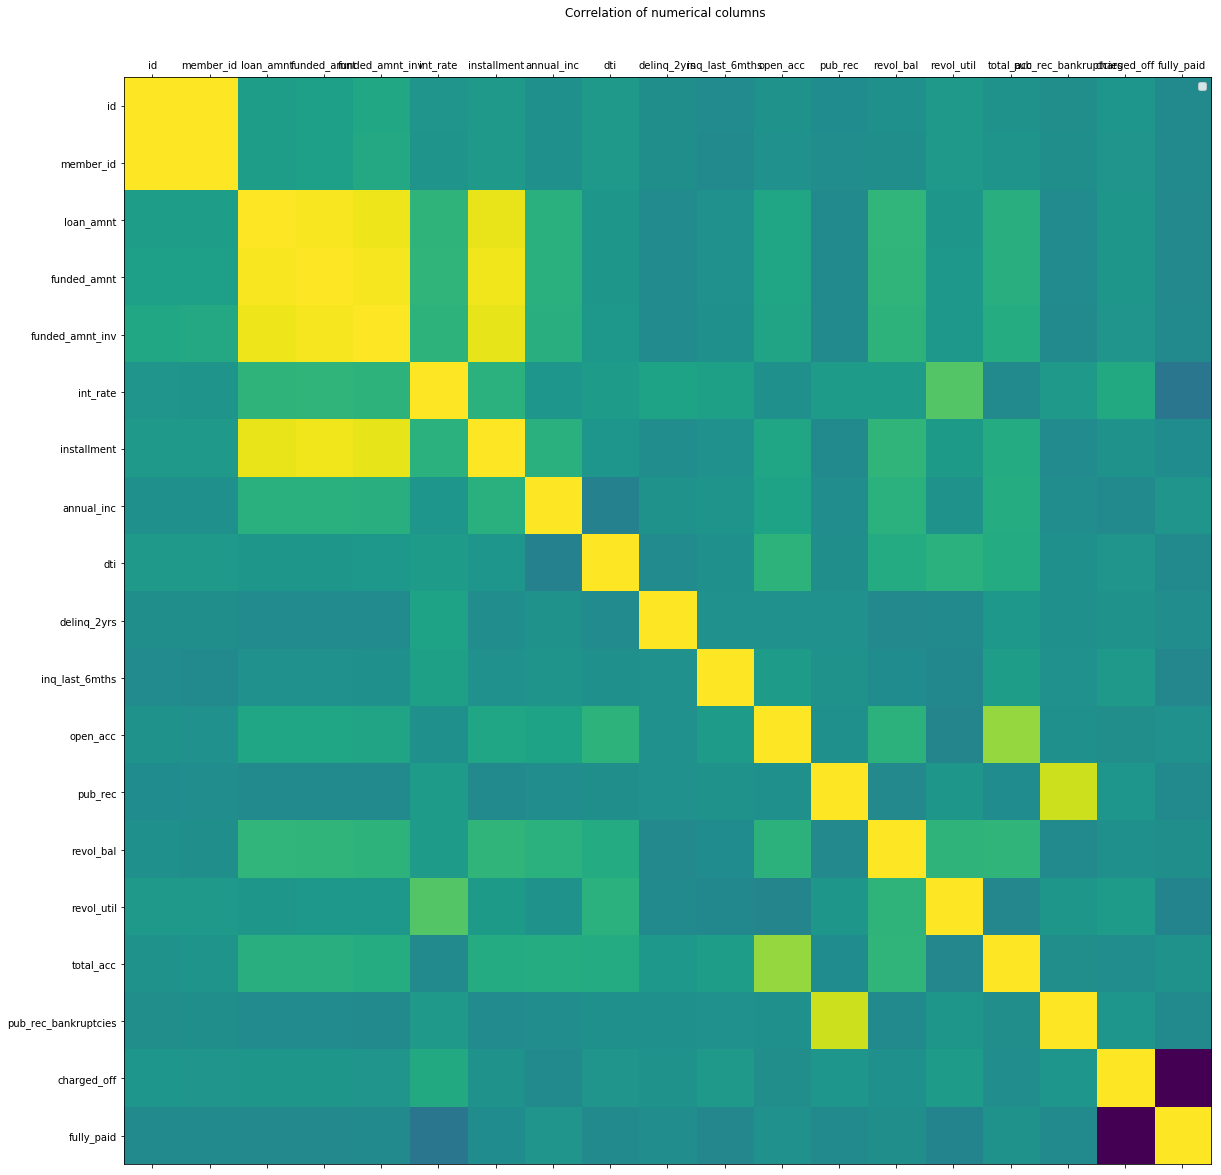

In [140]:
corr = loan_df._get_numeric_data().corr()
fig, ax = plt.subplots(figsize=(20, 20))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
ax.legend()
plt.title('Correlation of numerical columns ')
plt.show()

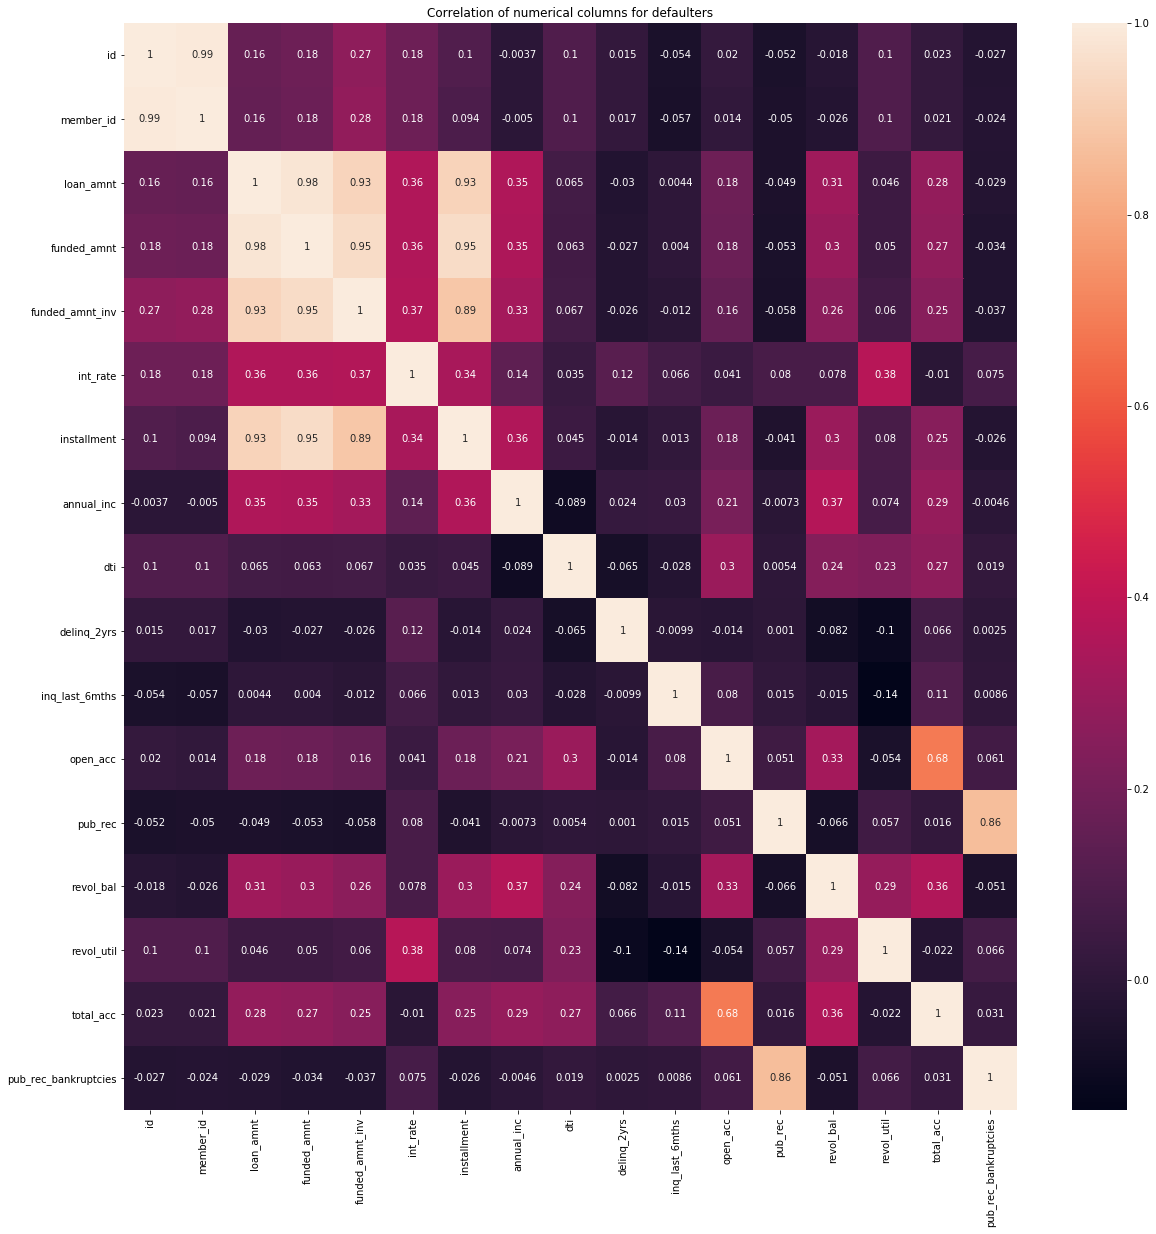

In [141]:
corr_df = default_paid_df.corr(method='pearson')
plt.subplots(figsize=(20, 20))
sns.heatmap(corr_df, annot=True,
          xticklabels=corr_df.columns.values,
          yticklabels=corr_df.columns.values)
plt.title('Correlation of numerical columns for defaulters')
plt.show()

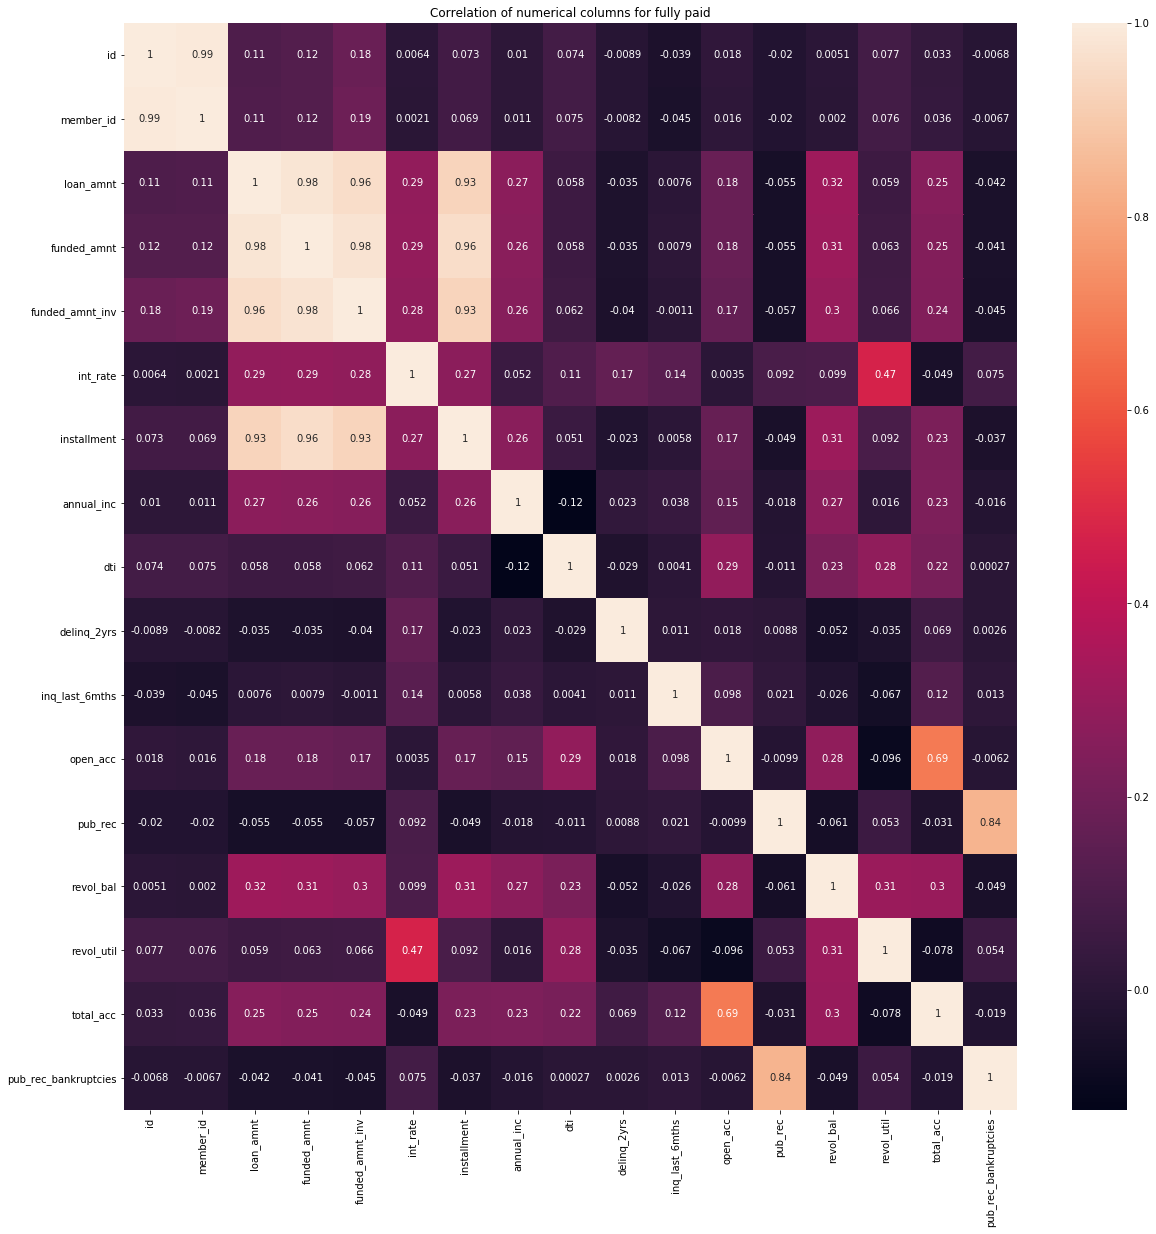

In [142]:
corr_df = fully_paid_df.corr(method='pearson')
plt.subplots(figsize=(20, 20))
sns.heatmap(corr_df, annot=True,
          xticklabels=corr_df.columns.values,
          yticklabels=corr_df.columns.values)
plt.title('Correlation of numerical columns for fully paid')
plt.show()